## Telecom Churn Case Study

### Problem Statement :

As we know that telecom industry is highly competitive, as customers have multiple service provider options and they can switch from one to another at any point of time they want. due to this competitency telecom industry facing 15-20 % churn rate yearly. as a solution companies want to predict high value churn customer beforehand and take action accordingly such as giving special offers, low rate plan to retain this customers. acqisition of customers is 5-10 times more costly than retaining the existing customer hence companies wants to predict and retain those high value customers

In [1]:
# Importing Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading & Understanding the dataset

In [2]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Checking shape of dataframe
df.shape

(99999, 226)

In [4]:
# For displaying maximum rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [7]:
# Checking statistical distribution of data
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Preparation

### A. Deriving new features to get High value customers

As per given definition of high value customer , we will required average recharge amount of customer of first 2 months. So, average recharge amount will be addtion of takltime recharge and data recharge. we already have total recharge amount for talktime so we have to calculate total recharge amopunt for data. Total recharge amount of data will be product average recharge amount of data for that month and number of data recharge.

In [8]:
df['total_rech_amt_data_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_amt_data_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_rech_amt_data_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']

#### Dropping the columns which we used to create new features as it will be redundant information.

In [9]:
drop_col = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_data_6',
           'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']
df = df.drop(drop_col, axis=1)

In [10]:
# Checking shape again ( added 4 new columns and deleted 8 columns)
df.shape

(99999, 222)

In [11]:
# Checking null values for colums which will be required to calculate average recharge amount

print(df['total_rech_amt_data_6'].isnull().sum())
print(df['total_rech_amt_data_7'] .isnull().sum())
print(df['total_rech_amt_6'] .isnull().sum())
print(df['total_rech_amt_7'].isnull().sum())

74846
74428
0
0


In [12]:
# Filling missing values with 'Zeros', as missing recharge amount indicates no rechagre hence imputting zero is a good approach

df['total_rech_amt_data_6'] = df['total_rech_amt_data_6'].fillna(0)
df['total_rech_amt_data_7'] = df['total_rech_amt_data_7'].fillna(0)

# Checking null values again
print(df['total_rech_amt_data_6'].isnull().sum())
print(df['total_rech_amt_data_7'] .isnull().sum())

0
0


### B. Filtering high value customers only

In [13]:
# Calculating average recharge amount of first two months

df ['avg_rech_amt_first_2mon' ] = ( df['total_rech_amt_data_6'] + df['total_rech_amt_data_7'] + df['total_rech_amt_6']
                           + df['total_rech_amt_7'] ) / 2


In [14]:
avg_rech_amt_first_2mon_70 = np.percentile(df['avg_rech_amt_first_2mon'], 70)
avg_rech_amt_first_2mon_70

478.0

#### As mentioned in the problem statement, we have to predict churn for high value customers only hence getting records related to those customer only

In [15]:
df = df [ df['avg_rech_amt_first_2mon'] >= avg_rech_amt_first_2mon_70 ]
df.shape

(30001, 223)

### C. Tag churners and remove attributes of the churn phase

In [16]:
# Creating separate dataframe of attributes which will be use to identify churn customers
churn_attributes = df[ ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'] ]
churn_attributes.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [17]:
# Adding 'sum_of_usage' column on basis of given churn attributes
df['sum_of_usage'] = churn_attributes.sum(axis=1)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,avg_rech_amt_first_2mon,sum_of_usage
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,25

In [18]:
# As per given understanding , tagging churn to the customers
df['churn'] = df['sum_of_usage'].apply(lambda x : 1 if x == 0 else 0 )

In [19]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,avg_rech_amt_first_2mon,sum_of_usage,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,25

In [20]:
# Creating list of all the attributes which are related to 9th month.

colms_9th_month = [col for col in df.columns.to_list() if '_9' in col]
colms_9th_month

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_rech_amt

In [21]:
# Remvoing attributes which are related 9th month

df = df.drop(colms_9th_month, axis=1)
df = df.drop('sum_of_usage' , axis=1)
df.shape

(30001, 171)

### Checking for missing values

In [22]:
null_percentage = round(df.isnull().mean()*100, 2).sort_values(ascending=False)
null_percentage

arpu_3g_8                   46.83
count_rech_2g_8             46.83
fb_user_8                   46.83
arpu_2g_8                   46.83
date_of_last_rech_data_8    46.83
total_rech_amt_data_8       46.83
night_pck_user_8            46.83
count_rech_3g_8             46.83
max_rech_data_8             46.83
arpu_2g_6                   44.15
fb_user_6                   44.15
max_rech_data_6             44.15
count_rech_2g_6             44.15
date_of_last_rech_data_6    44.15
count_rech_3g_6             44.15
arpu_3g_6                   44.15
night_pck_user_6            44.15
count_rech_2g_7             43.15
arpu_2g_7                   43.15
fb_user_7                   43.15
arpu_3g_7                   43.15
date_of_last_rech_data_7    43.15
night_pck_user_7            43.15
max_rech_data_7             43.15
count_rech_3g_7             43.15
std_og_t2c_mou_8             3.91
loc_ic_t2f_mou_8             3.91
isd_og_mou_8                 3.91
spl_og_mou_8                 3.91
og_others_8   

In [23]:
# checking variables which is having more than 40 % null valueslen
len(null_percentage[ null_percentage > 40 ])

25

Dropping columns which are having more than 40 % missing values as imputation of data for such large percentage of missing value variable will cause impact on our data

In [24]:
# Creating a list variables which are having more than 40 % missing values
null_vars = list(null_percentage[null_percentage.values > 40].index)
null_vars

['arpu_3g_8',
 'count_rech_2g_8',
 'fb_user_8',
 'arpu_2g_8',
 'date_of_last_rech_data_8',
 'total_rech_amt_data_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'max_rech_data_8',
 'arpu_2g_6',
 'fb_user_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'date_of_last_rech_data_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'night_pck_user_6',
 'count_rech_2g_7',
 'arpu_2g_7',
 'fb_user_7',
 'arpu_3g_7',
 'date_of_last_rech_data_7',
 'night_pck_user_7',
 'max_rech_data_7',
 'count_rech_3g_7']

In [25]:
# Deleting variables from dataset
print('No of variables before deleting highly missing value variables = ', df.shape[1])
print('No of variables which are having more than 70 % missing values =', len(null_vars))
df = df.drop(null_vars, axis=1)
print('No of variables after deleting highly missing value variables = ', df.shape[1])

No of variables before deleting highly missing value variables =  171
No of variables which are having more than 70 % missing values = 25
No of variables after deleting highly missing value variables =  146


### Missing Value Treatment

In [26]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_first_2mon,churn
count,3.000100e+04,30001.0,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,109.0,0.0,0.0,0.0,558.490824,560.782203,508.597957,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,16.408431,12.872921,13.009645,27.063178,20.519370,20.

As we can see from statistical distribution of 'loc_og_t2o_mou', 'std_og_t2o_mou' , 'loc_ic_t2o_mou' columns, they have only filled with 0 value hence dropping then would not affect out analysis. also dropping date & id's columns as they are not necessary for analysis.

In [27]:
drop_colm_02 = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
                'last_date_of_month_8' , 'mobile_number', 'circle_id', 'date_of_last_rech_6','date_of_last_rech_7',
                'date_of_last_rech_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6',
               'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [28]:
df = df.drop(drop_colm_02, axis=1)
df.shape

(30001, 129)

In [29]:
round(df.isnull().mean()*100, 2).sort_values(ascending=False)

isd_og_mou_8               3.91
std_ic_t2m_mou_8           3.91
std_ic_t2f_mou_8           3.91
std_og_t2f_mou_8           3.91
std_og_t2t_mou_8           3.91
loc_ic_t2f_mou_8           3.91
loc_og_mou_8               3.91
std_ic_mou_8               3.91
loc_og_t2c_mou_8           3.91
std_og_mou_8               3.91
loc_og_t2f_mou_8           3.91
loc_ic_mou_8               3.91
loc_og_t2m_mou_8           3.91
spl_ic_mou_8               3.91
loc_og_t2t_mou_8           3.91
std_og_t2m_mou_8           3.91
offnet_mou_8               3.91
og_others_8                3.91
ic_others_8                3.91
loc_ic_t2m_mou_8           3.91
spl_og_mou_8               3.91
std_ic_t2t_mou_8           3.91
roam_ic_mou_8              3.91
isd_ic_mou_8               3.91
onnet_mou_8                3.91
roam_og_mou_8              3.91
loc_ic_t2t_mou_8           3.91
std_ic_t2m_mou_6           1.82
std_og_mou_6               1.82
spl_og_mou_6               1.82
loc_ic_t2m_mou_6           1.82
og_other

In [30]:
df[df.isnull().any(axis=1)].head(20)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_first_2mon,churn
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,559.0,1
77,30.000,82.378,674.950,NaN,34.23,149.69,NaN,39.44,179.18,NaN,0.00,0.00,NaN,0.00,0.00,NaN,34.23,149.69,NaN,32.18,101.63,NaN,0.91,29.86,NaN,0.00,3.90,NaN,67.33,281.19,NaN,0.00,0.00,NaN,0.00,0.00,NaN,6.35,40.09,NaN,6.35,40.09,NaN,2.93,28.04,NaN,0.00,7.58,NaN,0.0,0.0,0.00,76.61,356.93,NaN,79.46,191.24,NaN,43.31,94.18,NaN,2.03,0.00,NaN,124.81,285.43,NaN,8.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,8.00,0.00,0.00,135.38,289.33,NaN,0.0,0.0,NaN,2.56,0.50,NaN,0.00,3.39,4,5,3,0,1154,750,0,1000,750,0,0,750,0.00,96.48,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,0.0,154.0,654.0,0
111,596.301,146.073,0.000,55.19,3.26,NaN,45.51,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.30,0.00,NaN,1.30,0.00,NaN,0.00,0.00,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.00,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.13,0.00,NaN,1.13,0.00,NaN,217.04,75.59,0.00,0.00,0.0,NaN,0.00,0.00,NaN,0.15,0.00,NaN,12,8,5,704,178,0,154,50,0,154,30,0,284.50,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,0,0,0,1,0,0,332,0.00,0.00,0.00,0.00,406.0,0.0,644.0,1
188,734.641,183.668,0.000,4.38,0.98,NaN,105.16,39.39,NaN,0.00,0.00,NaN,0.00,0.00,NaN,4.38,0.98,NaN,99.81,38.98,NaN,5.34,0.41,NaN,0.00,0.00,NaN,109.54,40.38,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,109.54,40.38,0.00,21.18,13.44,NaN,217.03,56.63,NaN,18.28,2.94,NaN,256.49,73.03,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN

As we can see from above, few of records having multiple missing values in it hence imputation will not be good approach as can mislead us in this case hence dropping records which are having missing records.

In [31]:
df = df.dropna()

In [32]:
round(df.isnull().mean()*100, 2).sort_values(ascending=False)

arpu_6                     0.0
loc_ic_mou_8               0.0
total_rech_amt_8           0.0
total_rech_amt_7           0.0
total_rech_amt_6           0.0
total_rech_num_8           0.0
total_rech_num_7           0.0
total_rech_num_6           0.0
ic_others_8                0.0
ic_others_7                0.0
ic_others_6                0.0
isd_ic_mou_8               0.0
isd_ic_mou_7               0.0
isd_ic_mou_6               0.0
spl_ic_mou_8               0.0
spl_ic_mou_7               0.0
spl_ic_mou_6               0.0
total_ic_mou_8             0.0
total_ic_mou_7             0.0
total_ic_mou_6             0.0
std_ic_mou_8               0.0
std_ic_mou_7               0.0
std_ic_mou_6               0.0
std_ic_t2f_mou_8           0.0
std_ic_t2f_mou_7           0.0
std_ic_t2f_mou_6           0.0
std_ic_t2m_mou_8           0.0
std_ic_t2m_mou_7           0.0
std_ic_t2m_mou_6           0.0
std_ic_t2t_mou_8           0.0
std_ic_t2t_mou_7           0.0
max_rech_amt_6             0.0
max_rech

In [33]:
df.isnull().sum().sum()

0

In [34]:
df.shape

(28504, 129)

### Exploratory data analysis

In [35]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 129 columns):
 #    Column                   Dtype  
---   ------                   -----  
 0    arpu_6                   float64
 1    arpu_7                   float64
 2    arpu_8                   float64
 3    onnet_mou_6              float64
 4    onnet_mou_7              float64
 5    onnet_mou_8              float64
 6    offnet_mou_6             float64
 7    offnet_mou_7             float64
 8    offnet_mou_8             float64
 9    roam_ic_mou_6            float64
 10   roam_ic_mou_7            float64
 11   roam_ic_mou_8            float64
 12   roam_og_mou_6            float64
 13   roam_og_mou_7            float64
 14   roam_og_mou_8            float64
 15   loc_og_t2t_mou_6         float64
 16   loc_og_t2t_mou_7         float64
 17   loc_og_t2t_mou_8         float64
 18   loc_og_t2m_mou_6         float64
 19   loc_og_t2m_mou_7         float64
 20   loc_og_t2m_mou_8         f

In [36]:
# Checking Total incoming minutes of usage
df[['total_ic_mou_6', 'loc_ic_mou_6', 'roam_ic_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6']].head()

,total_ic_mou_6,loc_ic_mou_6,roam_ic_mou_6,std_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
7,626.46,427.88,16.23,180.54,0.21,2.06
8,103.86,81.43,0.00,22.43,0.00,0.00
21,207.09,125.33,0.00,81.76,0.00,0.00
23,119.58,116.63,0.00,2.94,0.00,0.00
33,7.89,3.48,0.00,3.18,0.00,0.00


In [37]:
# Checking Total outcoming minutes of usage
df[['total_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6']].head()

,total_og_mou_6,roam_og_mou_6,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6
7,487.53,23.74,422.16,60.86,0.0,4.5
8,508.36,0.00,378.09,130.26,0.0,0.0
21,860.34,0.00,97.04,763.29,0.0,0.0
23,134.38,0.00,131.91,2.36,0.0,0.1
33,0.00,0.00,0.00,0.00,0.0,0.0


In [38]:
# Checking STD & Local outcoming calls minutes of usage
df[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
    'std_og_t2f_mou_6']].head()

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6
7,51.39,308.63,62.13,0.0,4.30,49.89,6.66
8,297.13,80.96,0.00,0.0,116.56,13.69,0.00
21,4.48,91.81,0.75,0.0,97.93,665.36,0.00
23,48.96,82.94,0.00,0.0,0.00,2.36,0.00
33,0.00,0.00,0.00,0.0,0.00,0.00,0.00


#### As we can see from bove 'total monthly usage' is a sum of 'local monthly usage', 'roaming monthly usage', 'STD calls usage', 'Special call usage' and 'Internation call usage', so considering all at the same time will cause multicolinearity issue hence dropping rest all monthly usage column.

In [39]:
redundant_colm = ['loc_ic_mou_6', 'roam_ic_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
                  'loc_ic_mou_7', 'roam_ic_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7',
                  'loc_ic_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
                  'roam_og_mou_6', 'loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
                  'roam_og_mou_7', 'loc_og_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
                  'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
                  'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
                  'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
                  'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
                  'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
                  'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
                  'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
                  'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
                  'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
                  'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
                  'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
                  'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7',
                  'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',]

In [40]:
df = df.drop(redundant_colm, axis=1)
df.shape

(28504, 60)

In [41]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   arpu_6                   28504 non-null  float64
 1   arpu_7                   28504 non-null  float64
 2   arpu_8                   28504 non-null  float64
 3   onnet_mou_6              28504 non-null  float64
 4   onnet_mou_7              28504 non-null  float64
 5   onnet_mou_8              28504 non-null  float64
 6   offnet_mou_6             28504 non-null  float64
 7   offnet_mou_7             28504 non-null  float64
 8   offnet_mou_8             28504 non-null  float64
 9   og_others_6              28504 non-null  float64
 10  og_others_7              28504 non-null  float64
 11  og_others_8              28504 non-null  float64
 12  total_og_mou_6           28504 non-null  float64
 13  total_og_mou_7           28504 non-null  float64
 14  total_og_mou_8        

In [42]:
all_colm = df.columns.to_list()

### Univariate Analysis

In [43]:
num_var = ['arpu_6','arpu_7','arpu_8','total_og_mou_6', 'total_og_mou_7',
 'total_og_mou_8', 'total_ic_mou_6','total_ic_mou_7', 'total_ic_mou_8','total_rech_num_6', 'total_rech_num_7',
 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
 'max_rech_amt_8','last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
 'vol_3g_mb_7', 'vol_3g_mb_8', 'aon','total_rech_amt_data_6', 'total_rech_amt_data_7','avg_rech_amt_first_2mon']

In [44]:
len(num_var)

31

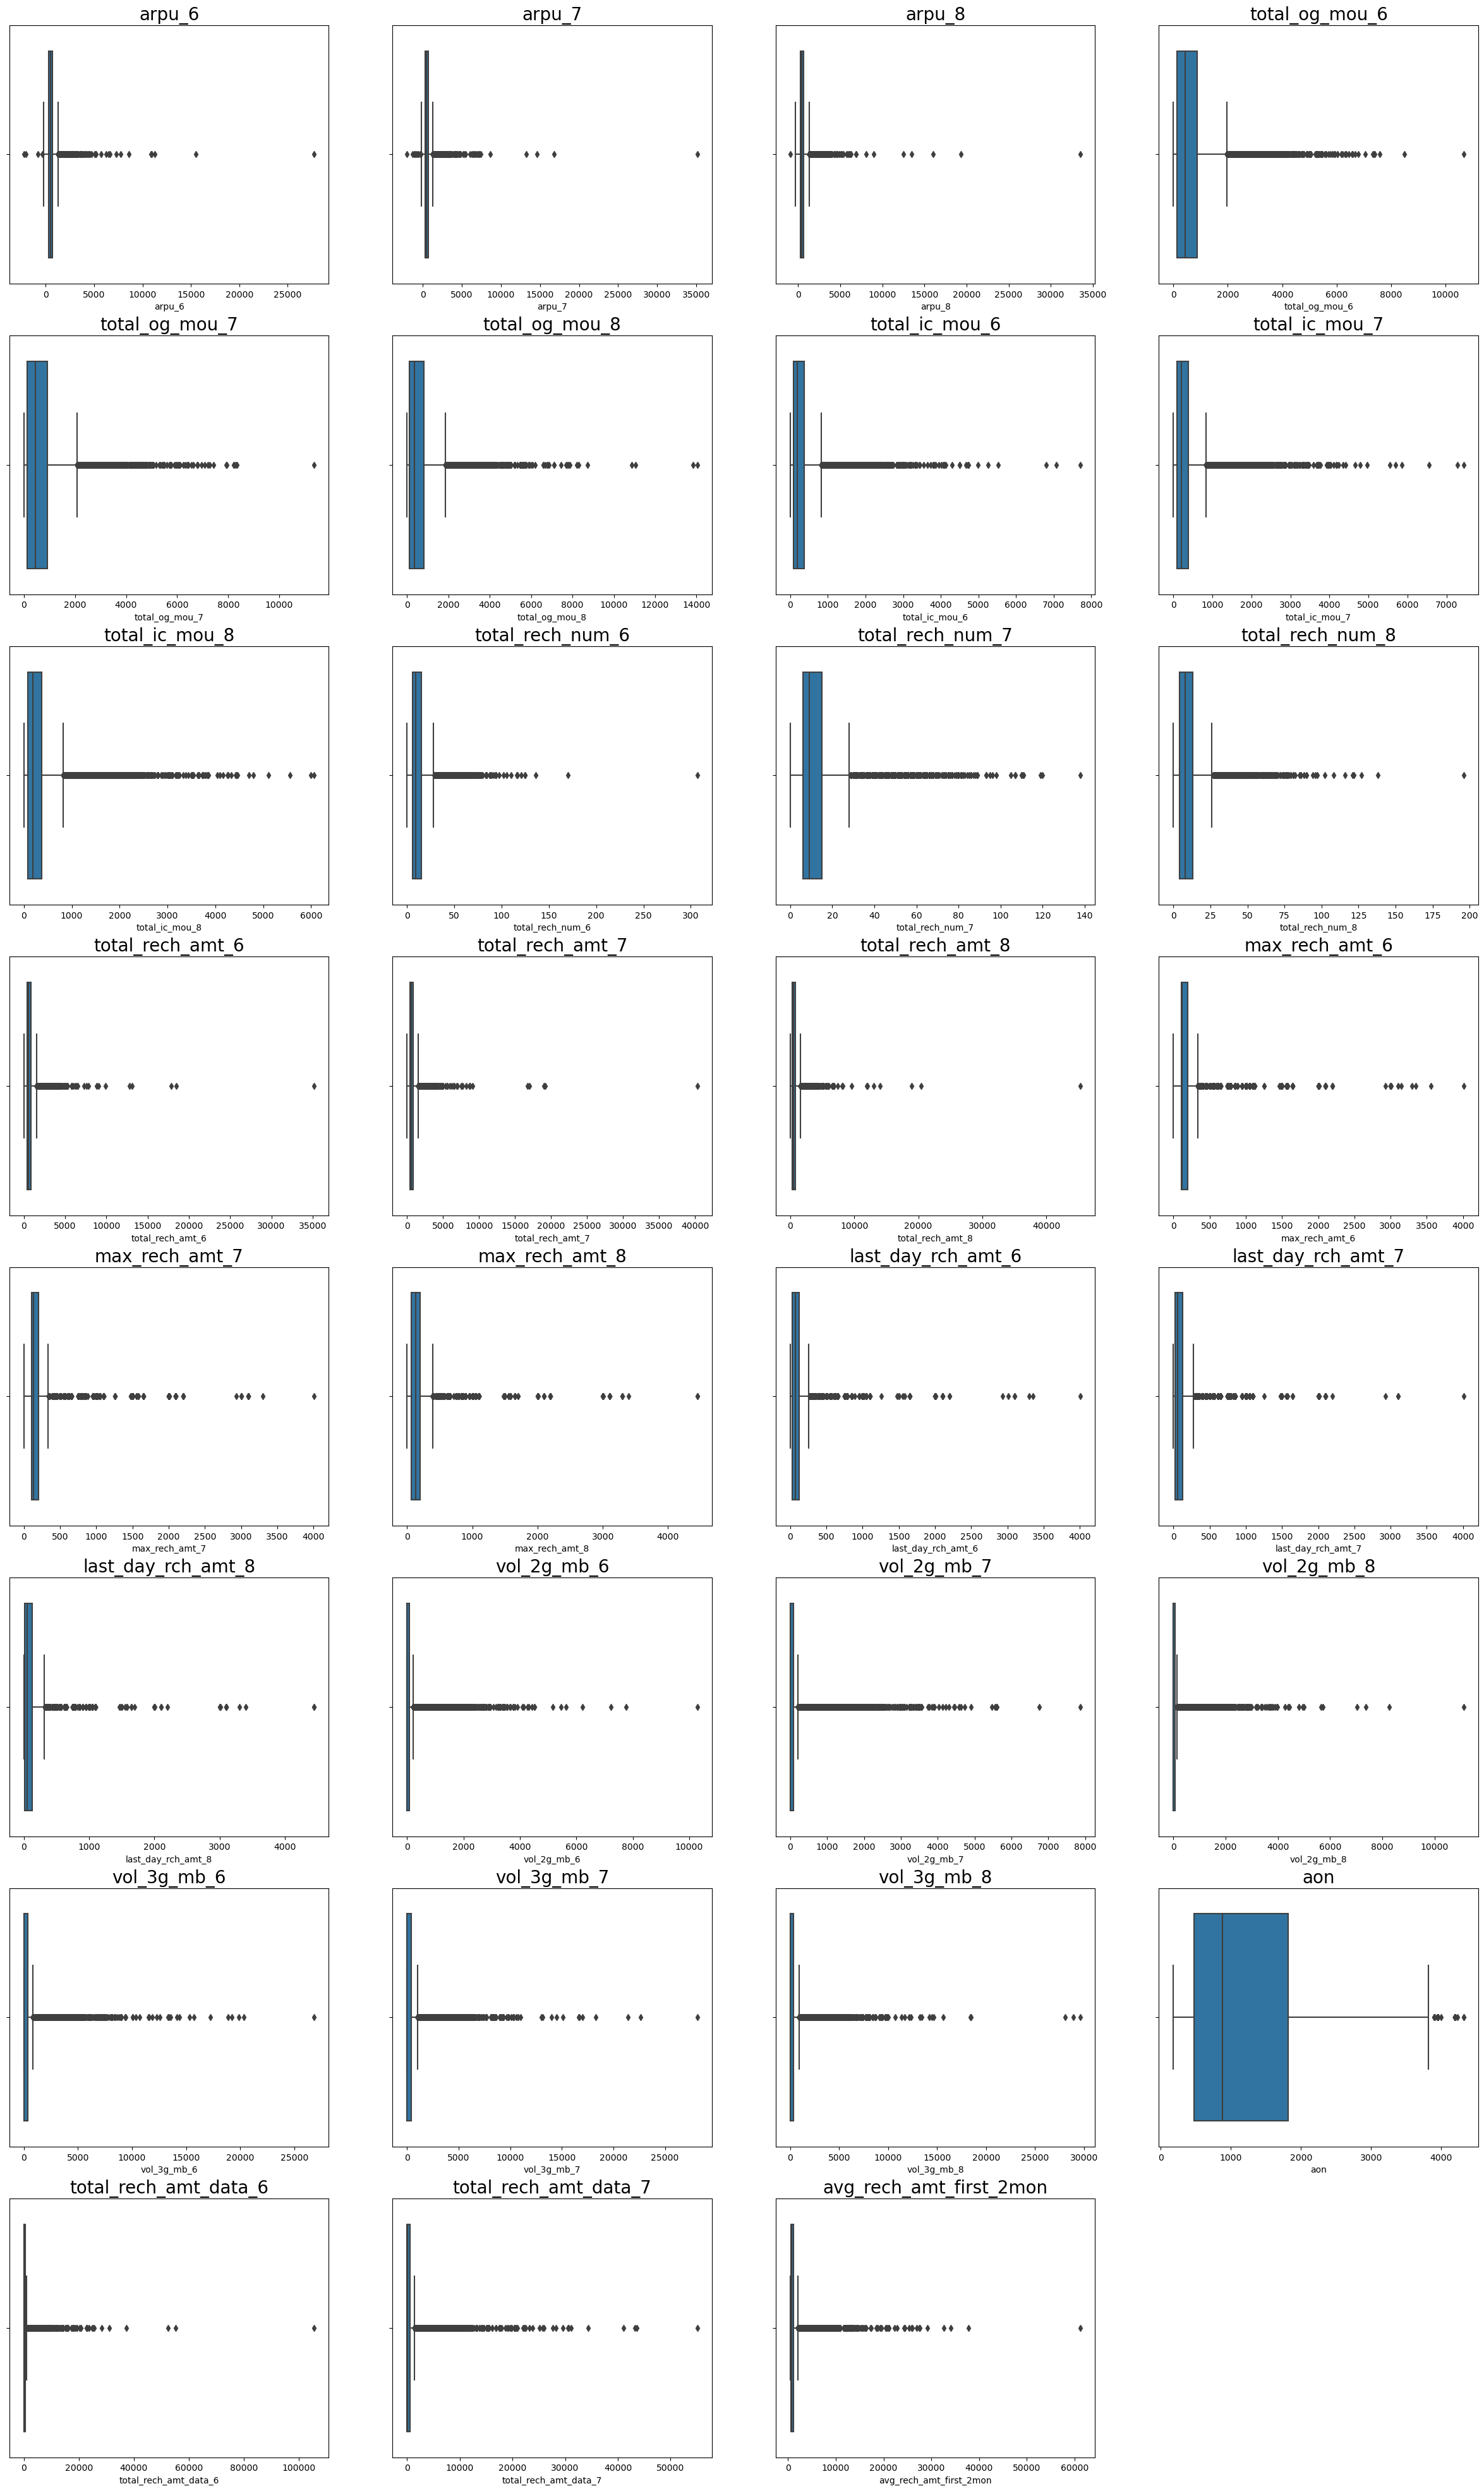

In [45]:
plt.figure(figsize=[30,50])
for ind, col in enumerate(num_var):
    plt.subplot(8,4,ind+1)
    sns.boxplot(data=df, x=df[col])
    plt.title(col,fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

### Inferences :

1. In Good & Action phase, distribution of Average revenue per user is almost same with few outliers
2. For all 3 months, total outgoing minutes of usage is almost same with around 2000 mintues and also contains some outliers which needs to be capped.
3. For all 3 months, total incoming minutes of usage is almost same with maximum around 2000 mintues and also contains some outliers which needs to be capped.
4. Total recharge number for all 3 months are maximum around 35 with few outliers.
5. Total recharge amount for all 3 month is almost same with below 5k and having few outliers which needs to be handled.
6. Maximumm recharge amount in all 3 month is below 300.
7. for all 3 months, maximum mobile internet usage volume of 2g is below 2000 MB & for 3g its below 500 MB
8. 50% of total customers are joined in last 3.5 years of span
9. Total data recharge amount is below 100 rupess for 50 % of total customers
10. For maximum customers , Average recharge amount of good phase is below 200 INR.

## Handling of outliers

For below attributes there few outliers in data which we can be removed as the number of records is very less for that, so deletion of such records will not cause any problem to our analysis.

In [46]:
df.shape

(28504, 60)

In [47]:
len(df [(df['arpu_6'] >= 5000) ])

15

In [48]:
len(df [(df['total_rech_amt_7'] >= 5000) ] )

23

In [49]:
len(df [(df['max_rech_amt_8'] >= 2000) ] )

30

In [50]:
len(df [(df['vol_2g_mb_6'] >= 2000) ] )

136

In [51]:
len(df [(df['vol_3g_mb_6'] >= 5000) ] )

124

In [52]:
len( df [(df['total_rech_amt_data_6'] >= 5000) ] )

297

In [53]:
 df = df[ ~( (df['arpu_6'] >= 5000) | (df['total_rech_amt_7'] >= 5000) | (df['max_rech_amt_8'] >= 2000) |
          (df['vol_2g_mb_6'] >= 2000) | (df['vol_3g_mb_6'] >= 5000) | (df['total_rech_amt_data_6'] >= 5000) )]

In [54]:
df.shape

(27972, 60)

## Bivariate analysis

In [55]:
num_var2 = ['arpu_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
           'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'total_rech_amt_data_7', 'avg_rech_amt_first_2mon']

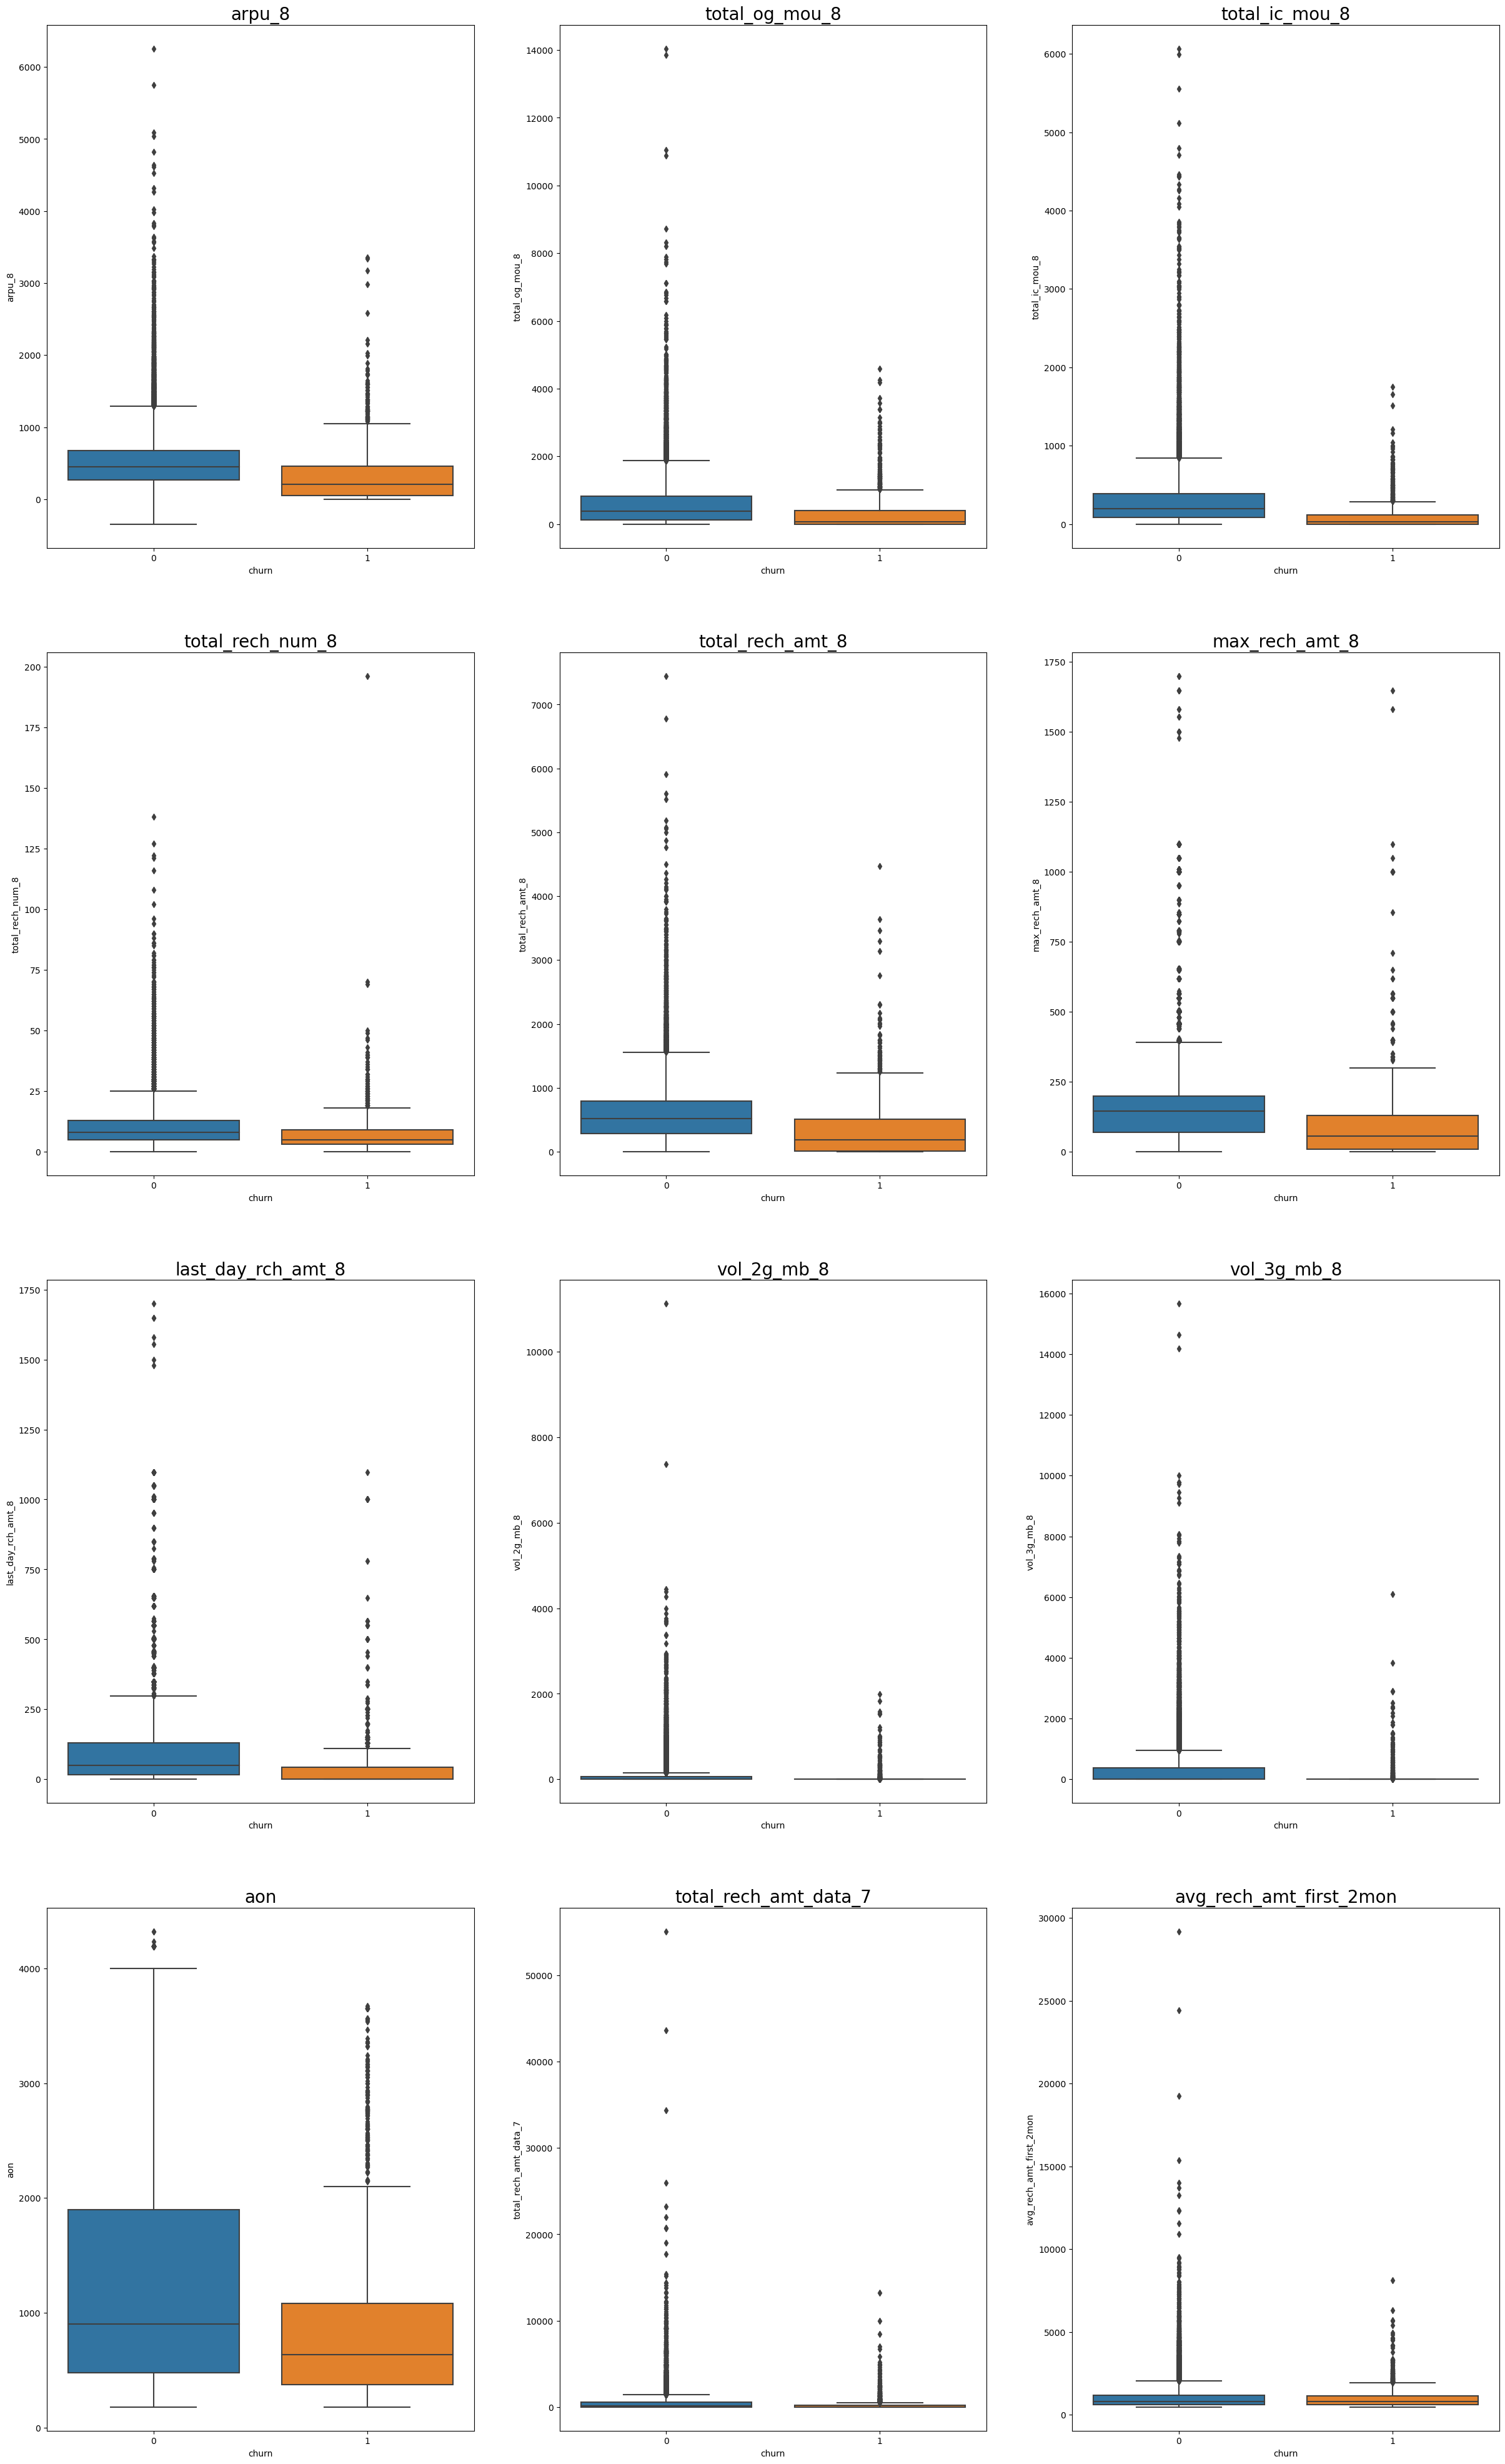

In [56]:
plt.figure(figsize=[30,50])
for ind, col in enumerate(num_var2):
    plt.subplot(4,3,ind+1)
    sns.boxplot(data=df, x=df['churn'], y= df[col])
    plt.title(col, fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

### Inferences :

1. If ARPU is less than 500 INR then customers are more likely to be churn.
2. Total outgoing & incoming minutes of usage is also driving factor to identify churn customer as usage of churn customers is
   far less than Non churn customers.
3. There is no significant change in churn and non churn customer in terms of total number recharges
4. Total recharge amount & maximum recharge amount is comparatively less of churn customer than Non churn customers
5. Customers who's usage of 2G & 3G in action month is significantly less are more likely to churn.
6. Last recharge amount can also be driving factor to identify churn customers.
7. Customers who's age with comapny is more 1000 days are more promising customers than the churn customers
8. There is No significant change in action month for churn & non churn customers in terms of Total data recharge & Average        recharge amount of first 2 months

### Multivariate Analysis

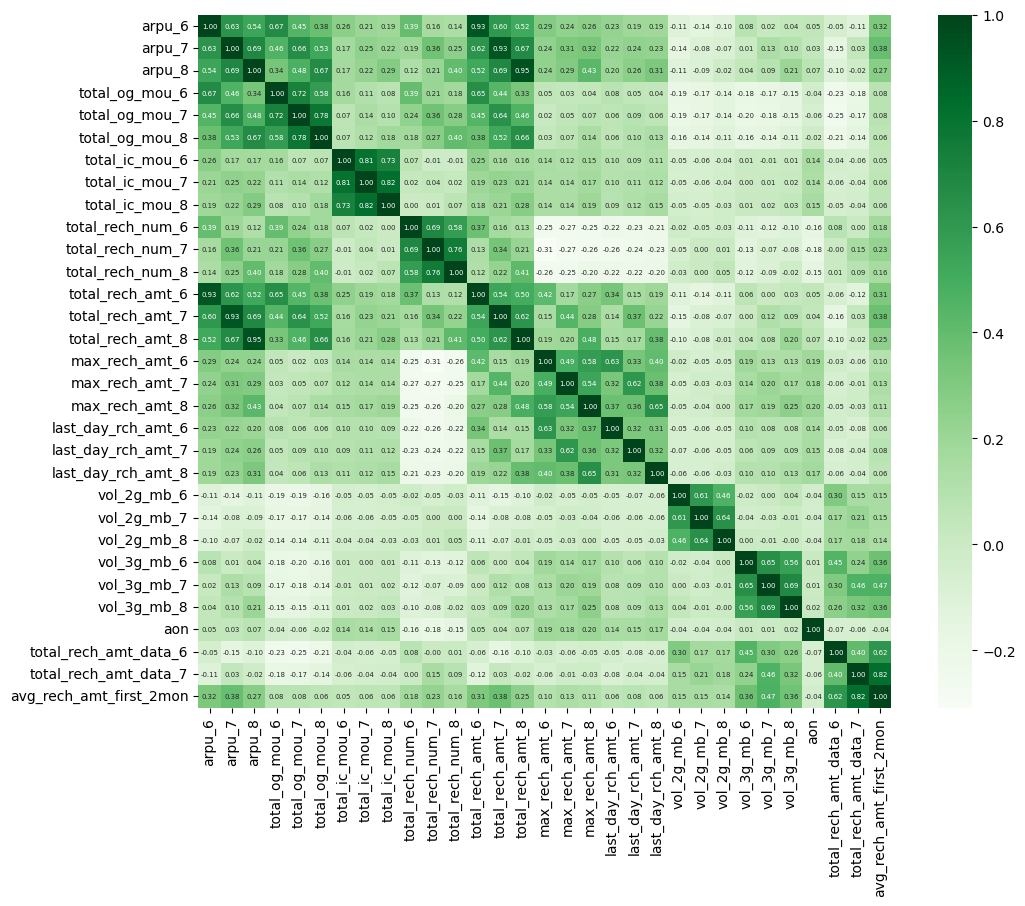

In [57]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12, 9))
sns.heatmap(df[num_var].corr() , cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':5}, cmap='Greens')
plt.show()

### Inferences:

1. Total recharge amount is highly correlated with average revenue per user.
2. Average recharge amount of first 2month is higly correlated with Total data recharge amount.
3. Total number of recharge in good phase is highly correlated with action phase.
4. Total incoming and outcoming minutes of usage in second month is correlated with remaining two months.

Hence dropping all correlated features to reduce multicolinearity

In [58]:
correlated_features = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'avg_rech_amt_first_2mon', 'total_rech_num_6',
'total_rech_num_7', 'total_og_mou_7', 'total_ic_mou_7']

In [59]:
df = df.drop(correlated_features, axis=1)
df.shape

(27972, 52)

### Train - Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
import numpy as np
import random


# Set seeds for NumPy, random, and TensorFlow
np.random.seed(42)
random.seed(42)

In [62]:
X = df.drop('churn', axis = 1)
y = df.churn

X_train, X_test, y_train, y_test = train_test_split( X, y , train_size=0.7 , stratify=y,  random_state=42)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19580, 51)
(19580,)
(8392, 51)
(8392,)


In [64]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_8,total_ic_mou_6,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7
58108,572.591,276.509,325.995,635.48,355.91,368.94,194.43,109.86,129.39,0.90,0.0,0.0,832.11,509.99,73.13,272.23,0.0,0.0,0.00,14,50,50,50,36,0,36,29.82,0.00,0.00,295.29,0.00,0.00,0,0,0,5,0,0,0,0,0,0,0,0,417,0.00,0.00,275.21,0.00,585.0,0.0
27763,119.902,218.369,64.279,0.00,7.14,2.96,7.58,49.81,22.54,0.43,0.0,0.0,8.01,27.38,72.31,38.71,0.0,0.0,0.00,6,46,98,25,25,98,25,1.16,92.96,2.77,201.75,94.29,216.86,0,0,0,5,3,3,0,0,0,0,0,0,894,78.59,56.43,19.87,0.00,835.0,663.0
10786,301.050,258.950,24.620,24.33,93.31,7.21,195.29,171.23,3.21,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,4,120,120,0,120,86,0,357.72,99.50,0.00,0.00,0.00,0.00,0,0,0,1,1,0,0,0,0,1,1,0,552,0.00,0.00,0.00,0.00,608.0,608.0
91434,382.594,503.601,440.195,0.80,73.21,218.26,529.39,606.68,693.03,0.00,0.0,0.0,530.36,911.73,79.46,144.33,0.0,0.0,11.96,4,110,150,130,110,150,36,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1718,0.00,0.00,0.00,0.00,0.0,0.0
40179,846.367,822.633,863.751,1567.58,857.76,498.33,224.63,271.64,139.79,2.14,0.0,0.0,1797.53,647.51,2642.56,1233.79,0.0,0.0,0.00,34,102,150,50,30,50,10,181.04,32.18,45.28,57.31,1092.20,863.86,0,0,0,4,3,2,0,0,0,0,0,6,872,514.79,438.21,34.75,133.95,432.0,192.0


In [65]:
all_columns = X_train.columns.to_list()

### Standardization

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train = scaler.fit_transform(X_train)

In [69]:
X_train = pd.DataFrame(X_train, columns=all_columns)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_8,total_ic_mou_6,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7
0,0.418833,0.279621,0.063069,0.086147,0.048024,0.034312,0.023251,0.011364,0.009237,0.001476,0.0,0.0,0.077956,0.036316,0.010337,0.045442,0.0,0.0,0.000000,0.101449,0.012469,0.016129,0.029429,0.008978,0.000000,0.021189,0.014997,0.000000,0.000000,0.059280,0.000000,0.000000,0.0,0.0,0.0,0.208333,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.057233,0.000000,0.000000,0.040312,0.000000,0.117801,0.000000
1,0.351867,0.269241,0.017846,0.000000,0.000963,0.000275,0.000906,0.005153,0.001609,0.000705,0.0,0.0,0.000750,0.001950,0.010221,0.006462,0.0,0.0,0.000000,0.043478,0.011471,0.031613,0.014715,0.006234,0.046667,0.014715,0.000583,0.016581,0.000249,0.040502,0.008747,0.013853,0.0,0.0,0.0,0.208333,0.09375,0.068182,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.172422,0.011753,0.006157,0.002911,0.000000,0.168143,0.012037
2,0.378664,0.276486,0.010993,0.003298,0.012591,0.000671,0.023353,0.017713,0.000229,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.028986,0.029925,0.038710,0.000000,0.029925,0.040952,0.000000,0.179899,0.017748,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.041667,0.03125,0.000000,0.0,0.0,0.0,0.043478,0.045455,0.000000,0.089833,0.000000,0.000000,0.000000,0.000000,0.122433,0.011038
3,0.390727,0.320164,0.082802,0.000108,0.009879,0.020298,0.063306,0.062757,0.049476,0.000000,0.0,0.0,0.049687,0.064924,0.011232,0.024092,0.0,0.0,0.009885,0.028986,0.027431,0.048387,0.076516,0.027431,0.071429,0.021189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.371408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.459333,0.377122,0.155990,0.212504,0.115741,0.046345,0.026862,0.028099,0.009980,0.003509,0.0,0.0,0.168402,0.046109,0.373528,0.205951,0.0,0.0,0.000000,0.246377,0.025436,0.048387,0.029429,0.007481,0.023810,0.005886,0.091046,0.005740,0.004073,0.011505,0.101319,0.055182,0.0,0.0,0.0,0.166667,0.09375,0.045455,0.0,0.0,0.0,0.000000,0.000000,0.146341,0.167109,0.076985,0.047810,0.005090,0.051154,0.086992,0.003486


In [70]:
X_test = scaler.transform(X_test)

In [71]:
X_test = pd.DataFrame(X_test, columns=all_columns)
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_8,total_ic_mou_6,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7
0,0.427572,0.362404,0.114462,0.094525,0.107575,0.110756,0.018333,0.023614,0.008680,0.0,0.0,0.0,0.059610,0.093462,0.023731,0.020228,0.000000,0.000000,0.000587,0.072464,0.029925,0.048387,0.076516,0.027431,0.057143,0.076516,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.092731,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.410520,0.285931,0.076516,0.001856,0.005540,0.004518,0.043269,0.009264,0.012251,0.0,0.0,0.0,0.035370,0.015791,0.043745,0.031339,0.000000,0.000000,0.000000,0.021739,0.062843,0.081290,0.148323,0.027431,0.000000,0.148323,0.034077,0.001846,0.001613,0.206341,0.04788,0.015866,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.071429,0.1,0.000000,0.0,0.0,0.245834,0.029452,0.029037,0.097775,0.0,0.050745,0.004575
2,0.394470,0.310716,0.025420,0.094590,0.131718,0.031668,0.002240,0.001765,0.000595,0.0,0.0,0.0,0.067125,0.024842,0.009938,0.007714,0.000000,0.000000,0.000000,0.021739,0.031920,0.035484,0.088287,0.029925,0.052381,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.043478,0.0,0.0,0.085487,0.000000,0.000000,0.000000,0.0,0.008256,0.000000
3,0.412559,0.367692,0.110693,0.016036,0.015397,0.006160,0.033470,0.032677,0.019674,0.0,0.0,0.0,0.036831,0.024342,0.080532,0.073724,0.000841,0.002313,0.010216,0.021739,0.029925,0.080645,0.117716,0.029925,0.119048,0.090642,0.000000,0.053026,0.024599,0.000000,0.00000,0.000000,0.0,0.5,0.2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.766723,0.000000,0.000000,0.000000,0.0,0.000000,0.011184
4,0.430855,0.333602,0.109616,0.002448,0.001281,0.001593,0.013230,0.015287,0.009537,0.0,0.0,0.0,0.012056,0.010928,0.024302,0.050885,0.000000,0.000000,0.000000,0.166667,0.012469,0.035484,0.064744,0.012469,0.009524,0.005886,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.041667,0.0,0.022727,0.0,0.000000,0.0,0.000000,0.0,0.0,0.019319,0.000000,0.000000,0.000000,0.0,0.003423,0.000000


### Handling Imbalanced Dataset

Presence of minority class in the dataset.

Lets check out our target variable.

In [72]:
df['churn'].value_counts(normalize=True)*100     # 1- Churn & 0 - not Churn

0    94.401544
1     5.598456
Name: churn, dtype: float64

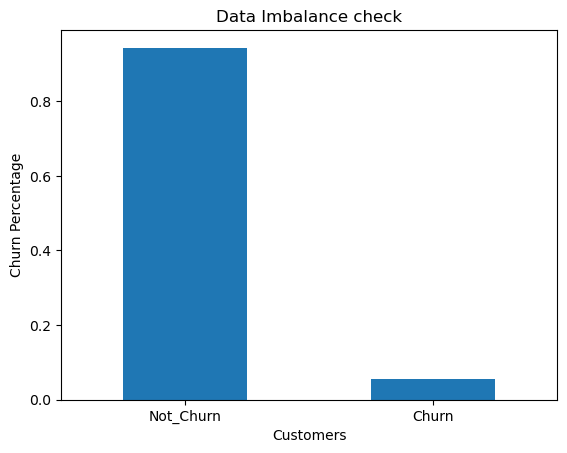

In [73]:
df['churn'].value_counts(normalize=True).reset_index()['churn'].plot.bar()
plt.title('Data Imbalance check')
plt.xlabel('Customers')
plt.ylabel('Churn Percentage')
plt.xticks((1,0),['Churn', 'Not_Churn'], rotation=0)
plt.show()

In [74]:
print(y_train.value_counts())
(y_train.value_counts(normalize=True)*100).reset_index()

0    18484
1     1096
Name: churn, dtype: int64


,index,churn
0,0,94.402451
1,1,5.597549


In [75]:
print(y_test.value_counts())
(y_test.value_counts(normalize=True)*100).reset_index()

0    7922
1     470
Name: churn, dtype: int64


,index,churn
0,0,94.399428
1,1,5.600572


#### To handle the imbalance in data we can use 'Random oversampling method' as there is No information loss also if there is overfitting issue due to copying of data we can handle that using regularization in later stage.

### Random Oversampling

In [76]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sample = RandomOverSampler(sampling_strategy = 1, random_state=42)
X_resampled, y_resampled = over_sample.fit_resample(X_train, y_train)
len(X_resampled)

36968

In [77]:
print(sorted(Counter(y_resampled).items()))

[(0, 18484), (1, 18484)]


In [78]:
len(y_resampled)

36968

In [79]:
X_resampled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_8,total_ic_mou_6,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7
0,0.418833,0.279621,0.063069,0.086147,0.048024,0.034312,0.023251,0.011364,0.009237,0.001476,0.0,0.0,0.077956,0.036316,0.010337,0.045442,0.0,0.0,0.000000,0.101449,0.012469,0.016129,0.029429,0.008978,0.000000,0.021189,0.014997,0.000000,0.000000,0.059280,0.000000,0.000000,0.0,0.0,0.0,0.208333,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.057233,0.000000,0.000000,0.040312,0.000000,0.117801,0.000000
1,0.351867,0.269241,0.017846,0.000000,0.000963,0.000275,0.000906,0.005153,0.001609,0.000705,0.0,0.0,0.000750,0.001950,0.010221,0.006462,0.0,0.0,0.000000,0.043478,0.011471,0.031613,0.014715,0.006234,0.046667,0.014715,0.000583,0.016581,0.000249,0.040502,0.008747,0.013853,0.0,0.0,0.0,0.208333,0.09375,0.068182,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.172422,0.011753,0.006157,0.002911,0.000000,0.168143,0.012037
2,0.378664,0.276486,0.010993,0.003298,0.012591,0.000671,0.023353,0.017713,0.000229,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.028986,0.029925,0.038710,0.000000,0.029925,0.040952,0.000000,0.179899,0.017748,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.041667,0.03125,0.000000,0.0,0.0,0.0,0.043478,0.045455,0.000000,0.089833,0.000000,0.000000,0.000000,0.000000,0.122433,0.011038
3,0.390727,0.320164,0.082802,0.000108,0.009879,0.020298,0.063306,0.062757,0.049476,0.000000,0.0,0.0,0.049687,0.064924,0.011232,0.024092,0.0,0.0,0.009885,0.028986,0.027431,0.048387,0.076516,0.027431,0.071429,0.021189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.371408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.459333,0.377122,0.155990,0.212504,0.115741,0.046345,0.026862,0.028099,0.009980,0.003509,0.0,0.0,0.168402,0.046109,0.373528,0.205951,0.0,0.0,0.000000,0.246377,0.025436,0.048387,0.029429,0.007481,0.023810,0.005886,0.091046,0.005740,0.004073,0.011505,0.101319,0.055182,0.0,0.0,0.0,0.166667,0.09375,0.045455,0.0,0.0,0.0,0.000000,0.000000,0.146341,0.167109,0.076985,0.047810,0.005090,0.051154,0.086992,0.003486


In [80]:
y_resampled.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [81]:
print(X_resampled.shape)
print(y_resampled.shape)

(36968, 51)
(36968,)


### PCA for Dimentionality reduction

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(random_state=42)

In [84]:
pca.fit(X_resampled)

PCA(random_state=42)

In [85]:
# Checking components of PCA
pca.components_

array([[ 1.26949574e-02,  2.73016665e-02,  7.50372632e-02, ...,
         3.19247551e-03, -2.62254083e-02, -2.02588103e-03],
       [-8.71403183e-02, -1.22841987e-01, -6.18159863e-02, ...,
         6.44375451e-03,  5.44131727e-01,  4.21263174e-02],
       [ 1.47258649e-01,  2.03359929e-01,  2.00602644e-01, ...,
         7.18808047e-03,  1.21310592e-02,  1.30265720e-03],
       ...,
       [ 6.67075699e-03, -1.58847274e-03, -6.90653126e-03, ...,
        -3.68425297e-03,  1.76484682e-04, -5.03330413e-03],
       [-3.75978067e-02, -3.90628068e-03,  6.43299335e-02, ...,
        -9.35374985e-03, -2.15351940e-04,  1.02810790e-03],
       [ 4.44522670e-03,  1.32287908e-03, -5.67895891e-03, ...,
         1.25806819e-03,  5.01212403e-04, -4.59767567e-04]])

In [86]:
# Checking explained variance ratio
pca.explained_variance_ratio_

array([2.08552077e-01, 1.60986639e-01, 1.06231184e-01, 7.83021833e-02,
       6.89398697e-02, 4.75907210e-02, 4.05786168e-02, 3.75929798e-02,
       2.81180898e-02, 2.15104109e-02, 1.99929473e-02, 1.67799550e-02,
       1.53339931e-02, 1.46102439e-02, 1.24720923e-02, 1.13040678e-02,
       1.05836201e-02, 9.83342142e-03, 9.26520550e-03, 7.60004489e-03,
       7.35987124e-03, 6.35076991e-03, 6.08749372e-03, 5.65809095e-03,
       5.17155284e-03, 4.78392766e-03, 4.51637063e-03, 3.95608390e-03,
       3.57460602e-03, 3.16346426e-03, 2.89235192e-03, 2.53254425e-03,
       2.16720780e-03, 2.05538409e-03, 1.97777989e-03, 1.77263790e-03,
       1.67606701e-03, 1.40811941e-03, 1.24410732e-03, 1.14749710e-03,
       9.42443433e-04, 8.10852512e-04, 7.14898743e-04, 6.09628097e-04,
       3.88438318e-04, 3.04296671e-04, 1.71945678e-04, 1.15107782e-04,
       9.91841724e-05, 9.13171242e-05, 7.75973003e-05])

#### Making scree plot to visualize explained variance

In [87]:
# Calculating cumulative variance
var_cumulative = np.cumsum(pca.explained_variance_ratio_)

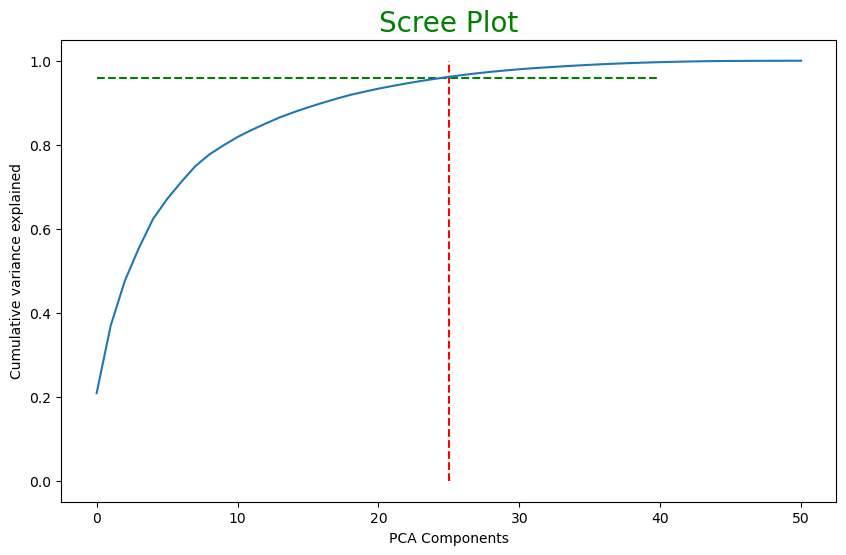

In [88]:
# Plotting scree plot
plt.figure(figsize=[10,6])
plt.vlines(x=25, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumulative)
plt.title('Scree Plot', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Cumulative variance explained")
plt.xlabel('PCA Components')
plt.show()

#### As we can see from above scree plot, 25 components are enough to explain 96% of variance in data.

In [89]:
from sklearn.decomposition import IncrementalPCA

In [90]:
pca_final = IncrementalPCA(n_components= 25)

In [91]:
X_train_pca = pca_final.fit_transform(X_resampled)

In [92]:
X_train_pca.shape

(36968, 25)

In [93]:
cormat = np.corrcoef(X_train_pca.transpose())

In [94]:
cormat.shape

(25, 25)

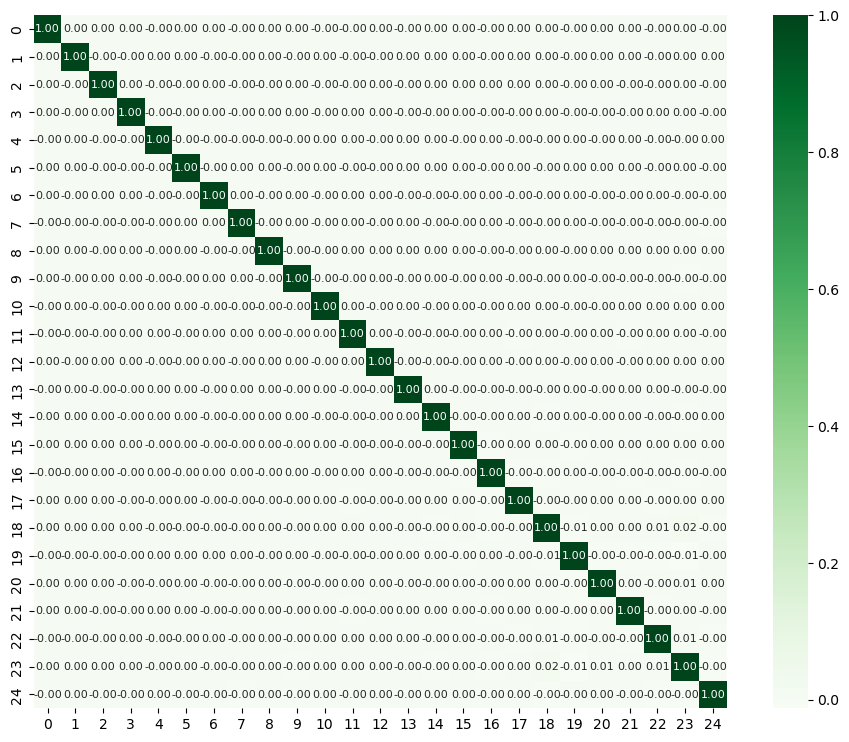

In [95]:
# Plotting correlation matrix to check correlation between components after PCA.

plt.figure(figsize=[12,9])
sns.heatmap( cormat, cbar=True, square=True, annot=True, cmap='Greens', annot_kws={'size':8}, fmt='.2f' )
plt.show()

#### As we can see from above plot, there is no multicolinearity issue present in dataset after PCA.

In [96]:
X_test_pca = pca_final.transform(X_test)

In [97]:
X_test_pca.shape

(8392, 25)

### Model Building

#### Let's try building logistic regression model first

In [98]:
pca_col = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'
           , 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25']

In [99]:
X_train_pca = pd.DataFrame(X_train_pca, columns=pca_col)
X_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.189559,0.042710,-0.039476,-0.105155,0.017022,-0.028503,-0.058599,-0.050071,-0.027483,0.033516,-0.033813,-0.035708,0.011226,-0.058424,0.026598,0.024945,-0.030932,-0.047244,-0.064405,-0.008520,0.017498,0.028982,0.018636,0.029179,-0.009255
1,-0.085560,0.131077,-0.139788,-0.163616,-0.066605,0.037213,-0.080806,-0.020682,-0.029183,-0.010782,-0.002057,0.030572,0.009175,-0.004620,-0.012230,0.008509,-0.020605,-0.043750,-0.019835,0.002226,0.014071,0.018714,0.015344,0.008988,-0.006386
2,-0.162066,0.095172,-0.137123,-0.008481,-0.054328,0.020334,0.100172,0.007279,-0.014511,0.015337,-0.038451,0.046430,0.014557,-0.042329,0.018895,0.011642,0.019531,0.022926,0.035209,0.011090,-0.000098,-0.018816,-0.021587,-0.022107,-0.002067
3,0.145107,-0.108698,-0.059605,-0.035879,-0.062496,0.028139,0.014782,0.044035,0.009541,0.013316,-0.026978,0.044178,-0.007346,-0.014545,0.006204,0.019394,-0.014346,-0.027314,0.017817,-0.007557,-0.025397,0.004381,-0.020201,-0.012503,-0.003868
4,-0.062658,-0.013509,0.016896,-0.051115,0.249032,-0.060448,-0.093609,-0.090998,0.133107,0.015994,0.055216,-0.187765,0.303893,0.023177,0.023992,-0.021636,0.010915,0.043729,-0.018408,-0.033389,0.067294,-0.022978,0.067147,0.063638,0.000925


In [100]:
import statsmodels.api as sm

In [101]:
logm1 = sm.GLM(y_resampled, (sm.add_constant(X_train_pca)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36968
Model:                            GLM   Df Residuals:                    36942
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18625.
Date:                Tue, 09 Jan 2024   Deviance:                       37249.
Time:                        22:15:56   Pearson chi2:                 5.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3152
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.013     -2.177      0.029      -0.055      -0.003
PC1           -3.3717      0.063    -53.473      0.000      -3.495      -3.248
PC2           -2.5728      0.071    -36.305      0.000      -2.712      -2.434
PC3           -1.1603      0.090    -12.923      0.000      -1.336      -0.984
PC4           -2.1057      0.102    -20.660      0.000      -2.306      -1.906
PC5           -0.6089      0.108     -5.647      0.000      -0.820      -0.398
PC6           -4.9657      0.138    -36.011      0.000      -5.236      -4.695
PC7            6.1562      0.145     42.356      0.000       5.871       6.441
PC8            2.3181      0.156     14.825      0.000       2.012       2.625
PC9           -9.0972      0.189    -48.098      0.000      -9.468      -8.726
PC10          -4.1641      0.191    -21.760      0.000      -4.539      -3.789
PC11           2.5675      0.205     12.523      0.000       2.166       2.969
PC12           8.8126      0.249     35.442      0.000       8.325       9.300
PC13          -5.0761      0.264    -19.199      0.000      -5.594      -4.558
PC14           0.0017      0.240      0.007      0.994      -0.468       0.471
PC15           2.1655      0.261      8.309      0.000       1.655       2.676
PC16          -6.7203      0.289    -23.279      0.000      -7.286      -6.155
PC17           8.8881      0.307     28.960      0.000       8.287       9.490
PC18           2.2320      0.286      7.810      0.000       1.672       2.792
PC19          -6.9600      0.296    -23.494      0.000      -7.541      -6.379
PC20           0.1426      0.325      0.439      0.661      -0.494       0.780
PC21          -0.9357      0.320     -2.921      0.003      -1.564      -0.308
PC22          -5.4263      0.368    -14.755      0.000      -6.147      -4.706
PC23           3.4473      0.381      9.052      0.000       2.701       4.194
PC24           1.8825      0.402      4.681      0.000       1.094       2.671
PC25           0.8994      0.425      2.118      0.034       0.067       1.732
==============================================================================
"""

#### As we can see from above summary, there are still few components which are insignificant in nature so we can use RFE to find out important features out of existing ones.

### Model evaluation: Cross validation

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
logreg = LogisticRegression(random_state=42)

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
cross_val_score(logreg, X_train_pca, y_resampled,  cv=5, n_jobs=-1, scoring='recall')

array([0.77711658, 0.76819042, 0.76737896, 0.78057359, 0.78658372])

In [106]:
cross_val_score(logreg, X_train_pca, y_resampled,  cv=5, n_jobs=-1, scoring='recall').mean()

0.775968654238197

#### Assessing the model with StatsModels

In [107]:
X_train_sm = sm.add_constant(X_train_pca)

logm2 = sm.GLM(y_resampled, X_train_sm, family=sm.families.Binomial())
model = logm2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36968
Model:                            GLM   Df Residuals:                    36942
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18625.
Date:                Tue, 09 Jan 2024   Deviance:                       37249.
Time:                        22:16:03   Pearson chi2:                 5.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3152
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.013     -2.177      0.029      -0.055      -0.003
PC1           -3.3717      0.063    -53.473      0.000      -3.495      -3.248
PC2           -2.5728      0.071    -36.305      0.000      -2.712      -2.434
PC3           -1.1603      0.090    -12.923      0.000      -1.336      -0.984
PC4           -2.1057      0.102    -20.660      0.000      -2.306      -1.906
PC5           -0.6089      0.108     -5.647      0.000      -0.820      -0.398
PC6           -4.9657      0.138    -36.011      0.000      -5.236      -4.695
PC7            6.1562      0.145     42.356      0.000       5.871       6.441
PC8            2.3181      0.156     14.825      0.000       2.012       2.625
PC9           -9.0972      0.189    -48.098      0.000      -9.468      -8.726
PC10          -4.1641      0.191    -21.760      0.000      -4.539      -3.789
PC11           2.5675      0.205     12.523      0.000       2.166       2.969
PC12           8.8126      0.249     35.442      0.000       8.325       9.300
PC13          -5.0761      0.264    -19.199      0.000      -5.594      -4.558
PC14           0.0017      0.240      0.007      0.994      -0.468       0.471
PC15           2.1655      0.261      8.309      0.000       1.655       2.676
PC16          -6.7203      0.289    -23.279      0.000      -7.286      -6.155
PC17           8.8881      0.307     28.960      0.000       8.287       9.490
PC18           2.2320      0.286      7.810      0.000       1.672       2.792
PC19          -6.9600      0.296    -23.494      0.000      -7.541      -6.379
PC20           0.1426      0.325      0.439      0.661      -0.494       0.780
PC21          -0.9357      0.320     -2.921      0.003      -1.564      -0.308
PC22          -5.4263      0.368    -14.755      0.000      -6.147      -4.706
PC23           3.4473      0.381      9.052      0.000       2.701       4.194
PC24           1.8825      0.402      4.681      0.000       1.094       2.671
PC25           0.8994      0.425      2.118      0.034       0.067       1.732
==============================================================================
"""

#### As we can see from above summary, now there are no insignificant componets

In [108]:
# Getting the predicted values on train dataset
y_train_pred = model.predict(X_train_sm)
y_train_pred[:10]

0    0.491941
1    0.497693
2    0.777008
3    0.422060
4    0.023265
5    0.258837
6    0.364026
7    0.159588
8    0.401034
9    0.251772
dtype: float64

In [109]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49194102, 0.49769301, 0.77700769, 0.42205964, 0.02326464,
       0.25883683, 0.36402589, 0.15958843, 0.40103402, 0.2517722 ])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [110]:
y_train_pred_final = pd.DataFrame({'churn': y_resampled.values, 'churn_prob': y_train_pred})
y_train_pred_final.head()

,churn,churn_prob
0,0,0.491941
1,0,0.497693
2,1,0.777008
3,0,0.422060
4,0,0.023265


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [111]:
y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.apply(lambda x : 1 if x >= 0.5 else 0 )
y_train_pred_final.head()

,churn,churn_prob,predicted
0,0,0.491941,0
1,0,0.497693,0
2,1,0.777008,1
3,0,0.422060,0
4,0,0.023265,0


### Confusion matrix

In [112]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [113]:
confusion = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
confusion

array([[14254,  4230],
       [ 4127, 14357]], dtype=int64)

In [114]:
print(accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.773939623458126


In [115]:
from sklearn.metrics import precision_score, recall_score

In [116]:
recall = recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)
recall

0.776725816922744

In [117]:
precision = precision_score(y_train_pred_final.churn, y_train_pred_final.predicted)
precision

0.7724215849787486

In [118]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [119]:
# Specificity
specificity = TN / float(TN + FP )
specificity

0.7711534299935079

In [120]:
# Importing VIF from stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
# Checking multicolinearity using VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_pca.columns
vif['VIF'] = [variance_inflation_factor(X_train_pca.values , i) for i in range (X_train_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
0,PC1,1.0
13,PC14,1.0
23,PC24,1.0
22,PC23,1.0
21,PC22,1.0
20,PC21,1.0
19,PC20,1.0
18,PC19,1.0
17,PC18,1.0
16,PC17,1.0


### Plotting the ROC Curve

In [122]:
# Defining function to draw ROC curve to check area under the curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
from sklearn import metrics

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

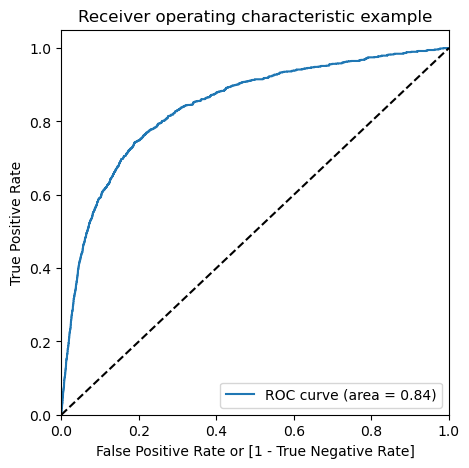

In [125]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

### Finding optimal cut-off point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [126]:
# let's create a column with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.churn_prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.491941,0,1,1,1,1,1,0,0,0,0,0
1,0,0.497693,0,1,1,1,1,1,0,0,0,0,0
2,1,0.777008,1,1,1,1,1,1,1,1,1,0,0
3,0,0.422060,0,1,1,1,1,1,0,0,0,0,0
4,0,0.023265,0,1,0,0,0,0,0,0,0,0,0


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[1,1]+cm1[0,0]) / total1
    sensi = cm1[1,1] / ( cm1[1,0] + cm1[1,1])
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.577662  0.977602  0.177721
0.2   0.2  0.648723  0.947468  0.349978
0.3   0.3  0.710669  0.912465  0.508873
0.4   0.4  0.751812  0.854523  0.649102
0.5   0.5  0.773940  0.776726  0.771153
0.6   0.6  0.762633  0.662303  0.862963
0.7   0.7  0.728847  0.535166  0.922528
0.8   0.8  0.661545  0.362584  0.960506
0.9   0.9  0.570196  0.154620  0.985771


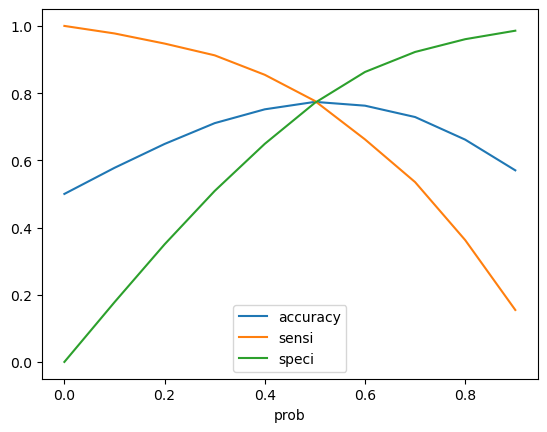

In [128]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

#### As we can see from above plot, the optimal cutoff value of probability is 0.5

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map(lambda x : 1 if x > 0.5 else 0)

y_train_pred_final.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.491941,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.497693,0,1,1,1,1,1,0,0,0,0,0,0
2,1,0.777008,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.422060,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.023265,0,1,0,0,0,0,0,0,0,0,0,0


In [130]:
confusion = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted)
confusion

array([[14254,  4230],
       [ 4127, 14357]], dtype=int64)

In [131]:
print(accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted))

0.773939623458126


In [132]:
from sklearn.metrics import precision_score, recall_score

In [133]:
recall = recall_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)
recall

0.776725816922744

In [134]:
precision = precision_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)
precision

0.7724215849787486

In [135]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [136]:
# Specificity
specificity = TN / float(TN + FP )
specificity

0.7711534299935079

#### As per given business objective, our main objective is to identify churn customer accurately than Non-churn customer hence recall is metric which we have to consider.

#### so we achieved 78 % recall using logistic regression model on train data set

## Step 12: Making predictions on the test set

In [137]:
X_test_pca.shape

(8392, 25)

In [138]:
X_test_pca = pd.DataFrame(X_test_pca, columns=pca_col)
X_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.117139,-0.138058,0.045229,0.007945,0.011999,0.025279,-0.001690,-0.109785,0.020216,0.025988,-0.037185,0.019020,-0.013381,-0.010524,0.010612,0.000624,-0.003447,-0.023291,0.010295,0.020157,0.010124,0.004361,-0.030063,0.003186,-0.005615
1,0.087581,0.112420,0.197510,-0.049572,-0.111428,0.047241,0.111527,-0.003219,-0.011026,0.008782,0.014134,-0.091245,-0.060902,0.009811,0.017725,-0.012083,-0.019651,-0.045734,-0.008485,0.002214,0.017852,0.022460,-0.005234,0.011886,0.027630
2,-0.142282,-0.103671,-0.008449,-0.014573,-0.069255,-0.022072,0.032869,-0.114362,-0.041606,-0.002614,-0.013613,0.028096,0.000884,-0.007908,-0.001060,-0.001670,0.019629,-0.002954,0.011461,-0.021156,-0.042885,-0.009009,0.013955,-0.020230,-0.017377
3,0.582324,-0.021767,-0.109989,0.231784,-0.064484,-0.058649,-0.208163,0.017475,-0.013940,-0.293173,-0.196069,-0.034591,0.002165,0.029054,0.033420,0.031604,0.030634,0.007858,-0.008306,0.020490,0.029295,0.003320,-0.001161,-0.047785,-0.002994
4,-0.199070,-0.064773,-0.006991,-0.016271,-0.072842,0.072167,-0.028658,0.000203,0.083841,0.051181,-0.047178,-0.016429,0.010064,-0.015552,0.003489,-0.000203,-0.013132,0.053383,-0.074727,0.001035,0.026246,-0.001246,0.036109,0.012020,0.001139


In [139]:
X_test_sm = sm.add_constant(X_test_pca)

In [140]:
y_test_pred = model.predict(X_test_sm)
y_test_pred.head()

0    0.458571
1    0.304103
2    0.835086
3    0.068480
4    0.433041
dtype: float64

In [141]:
y_test.shape

(8392,)

In [142]:
y_test_pred.shape

(8392,)

In [143]:
y_test_pred_final = pd.DataFrame({'churn': y_test.values, 'churn_prob': y_test_pred})
y_test_pred_final.head()

,churn,churn_prob
0,0,0.458571
1,0,0.304103
2,0,0.835086
3,0,0.068480
4,0,0.433041


In [144]:
y_test_pred_final['Final_prediction'] = y_test_pred_final.churn_prob.map(lambda x : 1 if x > 0.5 else 0)
y_test_pred_final.head()

,churn,churn_prob,Final_prediction
0,0,0.458571,0
1,0,0.304103,0
2,0,0.835086,1
3,0,0.068480,0
4,0,0.433041,0


In [145]:
# let's check overall accuracy of model
test_accuracy = metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.Final_prediction)
test_accuracy

0.7704957102001907

In [146]:
# Checking confusion metrics
test_Cm = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.Final_prediction)
test_Cm

array([[6088, 1834],
       [  92,  378]], dtype=int64)

In [147]:
TP = test_Cm[1,1] # true positive 
TN = test_Cm[0,0] # true negatives
FP = test_Cm[0,1] # false positives
FN = test_Cm[1,0] # false negatives

In [148]:
# Checking Sensitivity of model
test_sensitivity = TP / (TP + FN )
test_sensitivity

0.8042553191489362

In [149]:
# Checking Specificity
test_specificity = TN / (TN + FP)
test_specificity

0.7684928048472608

#### Final results on test model

In [150]:
print('Test_accuracy =' , round(test_accuracy,2))
print('Test_sensitivity =' , round(test_sensitivity,2))
print('Test_specificity =' , round(test_specificity,2))

Test_accuracy = 0.77
Test_sensitivity = 0.8
Test_specificity = 0.77


In [151]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

In [152]:
def Performance_summary (model_name, y_test, y_pred):
    print('Model_name :', str(model_name) )
    print ('Accuracy: ', accuracy_score(y_test, y_pred))
    print ('Recall: ', recall_score(y_test, y_pred))
    print ('Precision: ', precision_score(y_test, y_pred))
    print ('F1 score: ', f1_score(y_test, y_pred))
    
    return pd.DataFrame({"Model_name":[model_name],
                         "Accuracy":[accuracy_score(y_test, y_pred)],
                         "Recall":[recall_score(y_test, y_pred)],
                         "Precision":[precision_score(y_test, y_pred)],
                         "F1 score":[f1_score(y_test, y_pred)],
                         "roc_auc":[f1_score(y_test, y_pred)]})  

In [153]:
Model_01 = Performance_summary('logistic regression', y_test, y_test_pred_final.Final_prediction)
Model_01

Model_name : logistic regression
Accuracy:  0.7704957102001907
Recall:  0.8042553191489362
Precision:  0.17088607594936708
F1 score:  0.28187919463087246


,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,logistic regression,0.770496,0.804255,0.170886,0.281879,0.281879


#### So by logistic regression model we are getting 80% recall on test data set.

## Checking with Decision tree

In [154]:
# Importing Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [155]:
# Initiating & fitting decision tree classifier model
dt = DecisionTreeClassifier(random_state=42, max_depth=5)

model_02 = dt.fit(X_resampled, y_resampled)

In [156]:
# Validating model using cross validation technique 
cross_val_score(dt, X_resampled, y_resampled, n_jobs=-1, cv= 5, scoring='recall')

array([0.82418177, 0.78414931, 0.78469029, 0.77705628, 0.80200162])

In [157]:
# Checkinging default parameters of decision tree 
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

### Performing hyper parameter tunning

In [158]:
# Importing gridsearch cv for hyper parameter tunning
from sklearn.model_selection import GridSearchCV

In [159]:
# Defining hyper parameters for decision tree model
param = { 'max_depth': [3, 5, 10, 15, 20],
            'max_features': [3, 5, 7, 11, 15, 20, 25],
            'min_samples_leaf': [20, 50, 100, 200, 400],
            'criterion' : ['gini', 'entropy']}

In [160]:
# Intiating Gridsearch CV
model_cv = GridSearchCV ( estimator= dt, param_grid= param, verbose=1, cv=5, n_jobs=-1, return_train_score=True)

In [161]:
# Fitting Gridsearcg cv model on train dataset
model_02 = model_cv.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


In [162]:
model_02.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=25,
                       min_samples_leaf=20, random_state=42)

In [163]:
Grid_CV = DecisionTreeClassifier( max_depth=20, max_features=25, min_samples_leaf=20, random_state=42)

In [164]:
dt_model = Grid_CV.fit(X_resampled, y_resampled)

In [165]:
y_dt_test_pred = dt_model.predict(X_test)
y_dt_test_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [166]:
cross_val_score(Grid_CV, X_resampled, y_resampled, n_jobs=-1, cv=5, scoring='recall')

array([0.93670544, 0.93832837, 0.93481201, 0.93344156, 0.9377874 ])

In [167]:
Model_02 = Performance_summary('Decision Tree', y_test, y_dt_test_pred)
Model_02

Model_name : Decision Tree
Accuracy:  0.8667778836987607
Recall:  0.5936170212765958
Precision:  0.23134328358208955
F1 score:  0.3329355608591886


,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,Decision Tree,0.866778,0.593617,0.231343,0.332936,0.332936


In [168]:
Summary = pd.concat([Model_01, Model_02], axis=0)

In [169]:
Summary

,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,logistic regression,0.770496,0.804255,0.170886,0.281879,0.281879
0,Decision Tree,0.866778,0.593617,0.231343,0.332936,0.332936


## Checking with Random forest Now

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=8)

In [172]:
rf_model = rf.fit(X_resampled, y_resampled)

In [173]:
cross_val_score(rf, X_resampled, y_resampled, cv=5, n_jobs=-1, scoring='recall')

array([0.86827157, 0.86475521, 0.86177982, 0.86634199, 0.88260752])

In [174]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Performing hyper parameter tunning

In [175]:
hyper_params = {'max_depth' : [5, 10],
                'max_features' : [5, 7],
                'min_samples_leaf' : [50, 100],
                'n_estimators' : [25, 50]
}

In [176]:
model_cv1 = GridSearchCV(estimator=rf, 
             param_grid= hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [177]:
model_03 = model_cv1.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [178]:
model_03.best_estimator_

RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=50,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [179]:
model_03.best_score_

0.8838996973538743

In [180]:
Grid_CV =RandomForestClassifier( max_depth=10, max_features=7, min_samples_leaf=50, n_estimators=25,n_jobs=-1,random_state=42)

In [181]:
rf_final = Grid_CV.fit(X_resampled, y_resampled)

In [182]:
y_rf_test_pred = rf_final.predict(X_test)
y_rf_test_pred[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [183]:
cross_val_score(Grid_CV, X_resampled, y_resampled, n_jobs=-1, cv=5, scoring='recall')

array([0.8623208 , 0.86205031, 0.84906681, 0.86309524, 0.88395997])

In [184]:
Model_03 = Performance_summary('Random Forest', y_test, y_rf_test_pred)
Model_03

Model_name : Random Forest
Accuracy:  0.8996663489037178
Recall:  0.6893617021276596
Precision:  0.3176470588235294
F1 score:  0.4348993288590603


,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,Random Forest,0.899666,0.689362,0.317647,0.434899,0.434899


In [185]:
Summary = pd.concat([Summary, Model_03], axis=0)
Summary

,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,logistic regression,0.770496,0.804255,0.170886,0.281879,0.281879
0,Decision Tree,0.866778,0.593617,0.231343,0.332936,0.332936
0,Random Forest,0.899666,0.689362,0.317647,0.434899,0.434899


## Checking with Gradient Boosting now

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
GB = GradientBoostingClassifier(random_state=42)

In [188]:
GB_model = GB.fit(X_resampled, y_resampled)

In [189]:
y_GB_pred_test = GB_model.predict(X_test)
y_GB_pred_test[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [190]:
cross_val_score(GB, X_resampled, y_resampled, cv=5, n_jobs=-1, scoring='recall')

array([0.84987828, 0.85285367, 0.85664052, 0.84334416, 0.8596159 ])

In [191]:
GB_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [192]:
Model_04 = Performance_summary('Gradient Boosting', y_test, y_GB_pred_test)
Model_04

Model_name : Gradient Boosting
Accuracy:  0.8659437559580553
Recall:  0.7531914893617021
Precision:  0.25972120322817316
F1 score:  0.3862520458265139


,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,Gradient Boosting,0.865944,0.753191,0.259721,0.386252,0.386252


In [193]:
Summary = pd.concat([Summary, Model_04], axis=0)
Summary

,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,logistic regression,0.770496,0.804255,0.170886,0.281879,0.281879
0,Decision Tree,0.866778,0.593617,0.231343,0.332936,0.332936
0,Random Forest,0.899666,0.689362,0.317647,0.434899,0.434899
0,Gradient Boosting,0.865944,0.753191,0.259721,0.386252,0.386252


### Checking with XGBoost Now

In [194]:
!pip install xgboost

In [195]:
import xgboost as xgb

In [196]:
XGB = xgb.XGBClassifier( n_jobs=-1, max_depth= 4,  objective= 'binary:logistic', random_state=42 )

In [197]:
XGB_model = XGB.fit(X_resampled, y_resampled)

In [198]:
y_XGB_pred_test = XGB_model.predict(X_test)
y_XGB_pred_test[:5]

array([0, 0, 1, 0, 0])

In [199]:
cross_val_score( XGB, X_resampled, y_resampled, cv=5, n_jobs=-1, scoring='recall')

array([0.98214769, 0.97998377, 0.98214769, 0.9788961 , 0.97998377])

In [200]:
XGB_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 4,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [201]:
Model_05 = Performance_summary('XG Boost', y_test, y_XGB_pred_test)
Model_05

Model_name : XG Boost
Accuracy:  0.9080076263107721
Recall:  0.6425531914893617
Precision:  0.3333333333333333
F1 score:  0.43895348837209297


,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,XG Boost,0.908008,0.642553,0.333333,0.438953,0.438953


In [202]:
Summary = pd.concat([Summary, Model_05], axis=0)
Summary

,Model_name,Accuracy,Recall,Precision,F1 score,roc_auc
0,logistic regression,0.770496,0.804255,0.170886,0.281879,0.281879
0,Decision Tree,0.866778,0.593617,0.231343,0.332936,0.332936
0,Random Forest,0.899666,0.689362,0.317647,0.434899,0.434899
0,Gradient Boosting,0.865944,0.753191,0.259721,0.386252,0.386252
0,XG Boost,0.908008,0.642553,0.333333,0.438953,0.438953


### 🎯Inference :

The model training results reveal that logistic regression achieves a commendable recall percentage post-PCA implementation. Despite the reduction in model interpretability with PCA, the choice ultimately hinges on the business's preference. If a more interpretable solution is desired, opting for gradient boosting with meticulous hyperparameter tuning becomes a viable alternative.

## Building the logistic regression model without PCA

#### Building  another logistic regression model without PCA  model with the main objective of identifying important predictor attributes which help the business understand indicators of churn

In [203]:
print(X_resampled.shape)
print(y_resampled.shape)

(36968, 51)
(36968,)


In [204]:
X_resampled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_8,total_ic_mou_6,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7
0,0.418833,0.279621,0.063069,0.086147,0.048024,0.034312,0.023251,0.011364,0.009237,0.001476,0.0,0.0,0.077956,0.036316,0.010337,0.045442,0.0,0.0,0.000000,0.101449,0.012469,0.016129,0.029429,0.008978,0.000000,0.021189,0.014997,0.000000,0.000000,0.059280,0.000000,0.000000,0.0,0.0,0.0,0.208333,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.057233,0.000000,0.000000,0.040312,0.000000,0.117801,0.000000
1,0.351867,0.269241,0.017846,0.000000,0.000963,0.000275,0.000906,0.005153,0.001609,0.000705,0.0,0.0,0.000750,0.001950,0.010221,0.006462,0.0,0.0,0.000000,0.043478,0.011471,0.031613,0.014715,0.006234,0.046667,0.014715,0.000583,0.016581,0.000249,0.040502,0.008747,0.013853,0.0,0.0,0.0,0.208333,0.09375,0.068182,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.172422,0.011753,0.006157,0.002911,0.000000,0.168143,0.012037
2,0.378664,0.276486,0.010993,0.003298,0.012591,0.000671,0.023353,0.017713,0.000229,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.028986,0.029925,0.038710,0.000000,0.029925,0.040952,0.000000,0.179899,0.017748,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.041667,0.03125,0.000000,0.0,0.0,0.0,0.043478,0.045455,0.000000,0.089833,0.000000,0.000000,0.000000,0.000000,0.122433,0.011038
3,0.390727,0.320164,0.082802,0.000108,0.009879,0.020298,0.063306,0.062757,0.049476,0.000000,0.0,0.0,0.049687,0.064924,0.011232,0.024092,0.0,0.0,0.009885,0.028986,0.027431,0.048387,0.076516,0.027431,0.071429,0.021189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.371408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.459333,0.377122,0.155990,0.212504,0.115741,0.046345,0.026862,0.028099,0.009980,0.003509,0.0,0.0,0.168402,0.046109,0.373528,0.205951,0.0,0.0,0.000000,0.246377,0.025436,0.048387,0.029429,0.007481,0.023810,0.005886,0.091046,0.005740,0.004073,0.011505,0.101319,0.055182,0.0,0.0,0.0,0.166667,0.09375,0.045455,0.0,0.0,0.0,0.000000,0.000000,0.146341,0.167109,0.076985,0.047810,0.005090,0.051154,0.086992,0.003486


In [205]:
y_resampled.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

### Feature selection using RFE 

#### Using cross validation recursive feature elemination method to get the number of important features

In [206]:
from sklearn.feature_selection import RFECV

In [207]:
logreg_model = LogisticRegression(random_state=42)

In [208]:
rfecv = RFECV(estimator=logreg_model, cv=4, n_jobs=-1)
rfecv_model = rfecv.fit(X_resampled, y_resampled)

In [209]:
score = rfecv_model.cv_results_['mean_test_score']
score

array([0.6858905 , 0.70477169, 0.71172365, 0.71426639, 0.73111881,
       0.75013525, 0.76173988, 0.76233499, 0.76612205, 0.76871889,
       0.77494049, 0.77951201, 0.78078338, 0.78113504, 0.7820818 ,
       0.78221705, 0.78219   , 0.78416468, 0.78595001, 0.78640987,
       0.78657217, 0.78695088, 0.78635577, 0.78635577, 0.78938541,
       0.79049448, 0.79200931, 0.79154945, 0.79338888, 0.79309132,
       0.79336183, 0.79238801, 0.79268557, 0.79214456, 0.79198225,
       0.79217161, 0.79206341, 0.79198225, 0.791847  , 0.79130599,
       0.79049448, 0.79038628, 0.79027808, 0.79049448, 0.79071089,
       0.79044038, 0.79011578, 0.79003462, 0.79000757, 0.79022398,
       0.78992642])

In [210]:
rfecv_model.n_features_

29

In [211]:
num_features = X_resampled.shape[1]
num_features

51

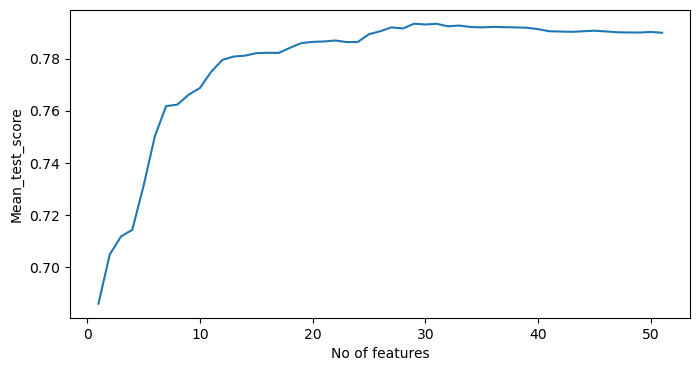

In [212]:
plt.figure(figsize=[8,4])
plt.plot(range(1, num_features+1), score)
plt.xlabel('No of features')
plt.ylabel('Mean_test_score')
plt.show()

#### Using RFE from feature selection to select 30 important features

In [213]:
from sklearn.feature_selection import RFE

In [214]:
rfe = RFE(estimator=logreg_model, n_features_to_select=30)
rfe = rfe.fit( X_resampled, y_resampled )

In [215]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False,  True, False,  True, False, False])

In [216]:
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 16),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('og_others_6', False, 17),
 ('og_others_7', False, 22),
 ('og_others_8', False, 21),
 ('total_og_mou_6', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', True, 1),
 ('total_ic_mou_8', True, 1),
 ('ic_others_6', False, 10),
 ('ic_others_7', False, 20),
 ('ic_others_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', False, 4),
 ('max_rech_amt_7', False, 19),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_6', False, 3),
 ('last_day_rch_amt_7', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_6', False, 9),
 ('vol_2g_mb_7', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', False, 18),
 ('vol_3g_mb_7', True, 1),
 ('vol_3g_mb_8', True, 1),
 ('monthly_2g_6', False, 8),
 ('monthly_2g_7', True, 1),
 ('monthly_2g_8', True, 1

In [217]:
imp_features = X_resampled.columns[rfe.support_]
imp_features

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'total_og_mou_6',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_8', 'aon', 'jul_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [218]:
X_resampled.columns[~rfe.support_]

Index(['onnet_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'ic_others_6', 'ic_others_7', 'max_rech_amt_6', 'max_rech_amt_7',
       'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6',
       'sachet_2g_6', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7',
       'sachet_3g_7', 'aug_vbc_3g', 'jun_vbc_3g', 'total_rech_amt_data_6',
       'total_rech_amt_data_7'],
      dtype='object')

### Model Building

In [219]:
X_train_sm_new = sm.add_constant(X_resampled[imp_features])

In [220]:
Logistic_model_01 = sm.GLM( y_resampled, X_train_sm_new, family=sm.families.Binomial() )
Logistic_model_01 = Logistic_model_01.fit()
Logistic_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36968
Model:                            GLM   Df Residuals:                    36937
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16992.
Date:                Tue, 09 Jan 2024   Deviance:                       33984.
Time:                        22:30:23   Pearson chi2:                 2.26e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3731
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2346      0.168     -1.397      0.162      -0.564       0.095
arpu_6                 1.1402      0.463      2.461      0.014       0.232       2.048
arpu_7                 2.9131      0.448      6.498      0.000       2.034       3.792
arpu_8                 1.2691      0.496      2.561      0.010       0.298       2.240
onnet_mou_6           11.9503      0.997     11.987      0.000       9.996      13.904
onnet_mou_7            5.0611      0.462     10.949      0.000       4.155       5.967
offnet_mou_6           9.5129      1.127      8.439      0.000       7.303      11.722
offnet_mou_7           8.9737      0.641     14.000      0.000       7.717      10.230
offnet_mou_8          -0.8098      1.211     -0.669      0.504      -3.183       1.563
total_og_mou_6       -12.9357      1.306     -9.902      0.000     -15.496     -10.375
total_og_mou_8       -19.8449      0.863    -23.005      0.000     -21.536     -18.154
total_ic_mou_6        10.7542      0.543     19.804      0.000       9.690      11.818
total_ic_mou_8       -25.8817      0.687    -37.682      0.000     -27.228     -24.535
ic_others_8            8.8458      1.951      4.534      0.000       5.022      12.670
total_rech_num_8      -4.0943      0.320    -12.810      0.000      -4.721      -3.468
max_rech_amt_8         2.1431      0.256      8.365      0.000       1.641       2.645
last_day_rch_amt_7    -1.2223      0.258     -4.741      0.000      -1.728      -0.717
last_day_rch_amt_8    -5.4678      0.279    -19.592      0.000      -6.015      -4.921
vol_2g_mb_7            3.7429      0.358     10.454      0.000       3.041       4.445
vol_2g_mb_8          -13.5204      1.202    -11.245      0.000     -15.877     -11.164
vol_3g_mb_7            1.8448      0.408      4.523      0.000       1.045       2.644
vol_3g_mb_8           -5.2091      0.851     -6.121      0.000      -6.877      -3.541
monthly_2g_7          -1.4613      0.182     -8.011      0.000      -1.819      -1.104
monthly_2g_8          -5.1007      0.333    -15.336      0.000      -5.753      -4.449
sachet_2g_8           -8.5060      0.442    -19.225      0.000      -9.373      -7.639
monthly_3g_8          -9.8795      0.599    -16.502      0.000     -11.053      -8.706
sachet_3g_6            4.8731      0.524      9.301      0.000       3.846       5.900
sachet_3g_8          -15.8392      1.515    -10.452      0.000     -18.809     -12.869
aon                   -1.3692      0.068    -20.215      0.000      -1.502      -1.236
jul_vbc_3g             3.8171      0.528      7.228      0.000       2.782       4.852
sep_vbc_3g          -100.2375      7.861    -12.752      0.000    -115.644     -84.831
======================================================================================
"""

📌 As We can see from above summary, 'offnet_mou_8	' variable has p-value greater than threshold value (i.e 0.05) which shows insignificany of that variable hence dropping the same.

In [221]:
X_train_sm_new = X_train_sm_new.drop('offnet_mou_8', axis=1)

Logistic_model_02 = sm.GLM( y_resampled, X_train_sm_new, family=sm.families.Binomial() )
Logistic_model_02 = Logistic_model_02.fit()
Logistic_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36968
Model:                            GLM   Df Residuals:                    36938
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16992.
Date:                Tue, 09 Jan 2024   Deviance:                       33984.
Time:                        22:30:24   Pearson chi2:                 2.21e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3731
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2457      0.167     -1.470      0.142      -0.573       0.082
arpu_6                 1.1556      0.463      2.496      0.013       0.248       2.063
arpu_7                 2.9380      0.447      6.576      0.000       2.062       3.814
arpu_8                 1.1932      0.482      2.474      0.013       0.248       2.138
onnet_mou_6           11.8756      0.991     11.989      0.000       9.934      13.817
onnet_mou_7            5.1711      0.433     11.946      0.000       4.323       6.019
offnet_mou_6           9.4201      1.118      8.423      0.000       7.228      11.612
offnet_mou_7           8.7823      0.572     15.349      0.000       7.661       9.904
total_og_mou_6       -12.8234      1.295     -9.902      0.000     -15.362     -10.285
total_og_mou_8       -20.1553      0.729    -27.629      0.000     -21.585     -18.726
total_ic_mou_6        10.7542      0.543     19.809      0.000       9.690      11.818
total_ic_mou_8       -25.8940      0.687    -37.716      0.000     -27.240     -24.548
ic_others_8            8.8523      1.952      4.535      0.000       5.026      12.678
total_rech_num_8      -4.0892      0.319    -12.800      0.000      -4.715      -3.463
max_rech_amt_8         2.1465      0.256      8.382      0.000       1.645       2.648
last_day_rch_amt_7    -1.2251      0.258     -4.752      0.000      -1.730      -0.720
last_day_rch_amt_8    -5.4660      0.279    -19.592      0.000      -6.013      -4.919
vol_2g_mb_7            3.7424      0.358     10.451      0.000       3.041       4.444
vol_2g_mb_8          -13.5223      1.203    -11.245      0.000     -15.879     -11.165
vol_3g_mb_7            1.8362      0.408      4.504      0.000       1.037       2.635
vol_3g_mb_8           -5.1954      0.851     -6.108      0.000      -6.863      -3.528
monthly_2g_7          -1.4628      0.182     -8.020      0.000      -1.820      -1.105
monthly_2g_8          -5.0966      0.333    -15.325      0.000      -5.748      -4.445
sachet_2g_8           -8.5075      0.442    -19.226      0.000      -9.375      -7.640
monthly_3g_8          -9.8738      0.599    -16.492      0.000     -11.047      -8.700
sachet_3g_6            4.8691      0.524      9.293      0.000       3.842       5.896
sachet_3g_8          -15.8130      1.515    -10.438      0.000     -18.782     -12.844
aon                   -1.3688      0.068    -20.210      0.000      -1.501      -1.236
jul_vbc_3g             3.8207      0.528      7.235      0.000       2.786       4.856
sep_vbc_3g          -100.2204      7.863    -12.746      0.000    -115.631     -84.810
======================================================================================
"""

### Checking Multicolinearity using VIF

In [222]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [223]:
def VIF(X_train_sm_new) :
    vif = pd.DataFrame()

    vif['Feature'] = X_train_sm_new.columns
    vif['VIF'] = [ variance_inflation_factor(X_train_sm_new, i) for i in range(X_train_sm_new.shape[1]) ]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by= 'VIF', ascending=False)
    return vif

In [224]:
print(VIF(X_train_sm_new))

               Feature     VIF
0                const  131.79
8       total_og_mou_6   28.81
6         offnet_mou_6   19.19
4          onnet_mou_6   17.55
3               arpu_8    4.78
7         offnet_mou_7    4.73
2               arpu_7    4.53
5          onnet_mou_7    4.01
9       total_og_mou_8    3.73
1               arpu_6    3.62
20         vol_3g_mb_8    3.37
19         vol_3g_mb_7    2.78
14      max_rech_amt_8    2.55
24        monthly_3g_8    2.46
11      total_ic_mou_8    2.14
28          jul_vbc_3g    2.04
16  last_day_rch_amt_8    1.95
10      total_ic_mou_6    1.94
13    total_rech_num_8    1.91
22        monthly_2g_8    1.75
18         vol_2g_mb_8    1.73
17         vol_2g_mb_7    1.58
21        monthly_2g_7    1.54
23         sachet_2g_8    1.40
26         sachet_3g_8    1.32
15  last_day_rch_amt_7    1.28
25         sachet_3g_6    1.17
27                 aon    1.12
29          sep_vbc_3g    1.04
12         ic_others_8    1.03


📌 As We can see from above table, 'total_og_mou_6 ' variable has very high VIF value which will cause multicolinearity issue hence dropping that variable.

In [225]:
X_train_sm_new = X_train_sm_new.drop('total_og_mou_6', axis=1)

Logistic_model_03 = sm.GLM( y_resampled, X_train_sm_new, family=sm.families.Binomial() )
Logistic_model_03 = Logistic_model_03.fit()
Logistic_model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36968
Model:                            GLM   Df Residuals:                    36939
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17048.
Date:                Tue, 09 Jan 2024   Deviance:                       34095.
Time:                        22:30:29   Pearson chi2:                 2.08e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3712
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5280      0.167     -3.155      0.002      -0.856      -0.200
arpu_6                 2.0668      0.462      4.470      0.000       1.161       2.973
arpu_7                 2.8512      0.447      6.378      0.000       1.975       3.727
arpu_8                 1.8441      0.472      3.911      0.000       0.920       2.768
onnet_mou_6            2.8143      0.381      7.385      0.000       2.067       3.561
onnet_mou_7            5.4008      0.436     12.401      0.000       4.547       6.254
offnet_mou_6          -0.8306      0.422     -1.970      0.049      -1.657      -0.004
offnet_mou_7           9.1123      0.574     15.886      0.000       7.988      10.237
total_og_mou_8       -21.2076      0.722    -29.379      0.000     -22.622     -19.793
total_ic_mou_6         9.7409      0.532     18.322      0.000       8.699      10.783
total_ic_mou_8       -25.5124      0.684    -37.312      0.000     -26.853     -24.172
ic_others_8            8.9456      1.931      4.633      0.000       5.161      12.730
total_rech_num_8      -4.3567      0.320    -13.629      0.000      -4.983      -3.730
max_rech_amt_8         1.9685      0.255      7.728      0.000       1.469       2.468
last_day_rch_amt_7    -1.2014      0.257     -4.670      0.000      -1.706      -0.697
last_day_rch_amt_8    -5.3527      0.278    -19.232      0.000      -5.898      -4.807
vol_2g_mb_7            3.6597      0.357     10.247      0.000       2.960       4.360
vol_2g_mb_8          -13.4978      1.205    -11.205      0.000     -15.859     -11.137
vol_3g_mb_7            1.7446      0.407      4.286      0.000       0.947       2.542
vol_3g_mb_8           -5.1675      0.851     -6.069      0.000      -6.836      -3.499
monthly_2g_7          -1.4687      0.182     -8.066      0.000      -1.826      -1.112
monthly_2g_8          -5.1675      0.332    -15.581      0.000      -5.818      -4.517
sachet_2g_8           -8.5116      0.443    -19.223      0.000      -9.379      -7.644
monthly_3g_8         -10.0919      0.598    -16.884      0.000     -11.263      -8.920
sachet_3g_6            4.7454      0.524      9.059      0.000       3.719       5.772
sachet_3g_8          -15.6075      1.505    -10.372      0.000     -18.557     -12.658
aon                   -1.3379      0.067    -19.874      0.000      -1.470      -1.206
jul_vbc_3g             3.7437      0.528      7.089      0.000       2.709       4.779
sep_vbc_3g          -101.2901      7.827    -12.941      0.000    -116.631     -85.949
======================================================================================
"""

In [226]:
print(VIF(X_train_sm_new))

               Feature     VIF
0                const  128.80
7         offnet_mou_7    4.73
3               arpu_8    4.71
2               arpu_7    4.52
5          onnet_mou_7    4.00
6         offnet_mou_6    3.82
8       total_og_mou_8    3.69
1               arpu_6    3.51
19         vol_3g_mb_8    3.37
4          onnet_mou_6    3.33
18         vol_3g_mb_7    2.78
13      max_rech_amt_8    2.54
23        monthly_3g_8    2.45
10      total_ic_mou_8    2.14
27          jul_vbc_3g    2.04
15  last_day_rch_amt_8    1.95
9       total_ic_mou_6    1.90
12    total_rech_num_8    1.90
21        monthly_2g_8    1.75
17         vol_2g_mb_8    1.73
16         vol_2g_mb_7    1.58
20        monthly_2g_7    1.54
22         sachet_2g_8    1.40
25         sachet_3g_8    1.32
14  last_day_rch_amt_7    1.28
24         sachet_3g_6    1.17
26                 aon    1.12
28          sep_vbc_3g    1.04
11         ic_others_8    1.03


📌 As We can see from summary, 'offnet_mou_6 ' variable has 0.049 p-value which is showing insignificance of that variable hence dropping the same.

In [229]:
X_train_sm_new = X_train_sm_new.drop('offnet_mou_6', axis=1)

Logistic_model_04 = sm.GLM( y_resampled, X_train_sm_new, family=sm.families.Binomial() )
Logistic_model_04 = Logistic_model_04.fit()
Logistic_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                36968
Model:                            GLM   Df Residuals:                    36940
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17050.
Date:                Tue, 09 Jan 2024   Deviance:                       34099.
Time:                        22:31:45   Pearson chi2:                 1.99e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3712
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4045      0.153     -2.637      0.008      -0.705      -0.104
arpu_6                 1.5134      0.360      4.199      0.000       0.807       2.220
arpu_7                 3.1057      0.428      7.253      0.000       2.266       3.945
arpu_8                 1.9473      0.469      4.156      0.000       1.029       2.866
onnet_mou_6            2.9944      0.369      8.120      0.000       2.272       3.717
onnet_mou_7            5.3314      0.434     12.279      0.000       4.480       6.182
offnet_mou_7           8.4528      0.465     18.180      0.000       7.542       9.364
total_og_mou_8       -21.3118      0.720    -29.592      0.000     -22.723     -19.900
total_ic_mou_6         9.6234      0.528     18.236      0.000       8.589      10.658
total_ic_mou_8       -25.3881      0.680    -37.330      0.000     -26.721     -24.055
ic_others_8            8.8938      1.921      4.629      0.000       5.128      12.660
total_rech_num_8      -4.3526      0.319    -13.628      0.000      -4.979      -3.727
max_rech_amt_8         1.9627      0.255      7.710      0.000       1.464       2.462
last_day_rch_amt_7    -1.2075      0.257     -4.691      0.000      -1.712      -0.703
last_day_rch_amt_8    -5.3473      0.278    -19.220      0.000      -5.893      -4.802
vol_2g_mb_7            3.6640      0.357     10.268      0.000       2.965       4.363
vol_2g_mb_8          -13.4801      1.203    -11.201      0.000     -15.839     -11.121
vol_3g_mb_7            1.7133      0.406      4.215      0.000       0.917       2.510
vol_3g_mb_8           -5.1782      0.851     -6.087      0.000      -6.845      -3.511
monthly_2g_7          -1.4716      0.182     -8.085      0.000      -1.828      -1.115
monthly_2g_8          -5.1609      0.332    -15.565      0.000      -5.811      -4.511
sachet_2g_8           -8.5162      0.443    -19.230      0.000      -9.384      -7.648
monthly_3g_8         -10.0421      0.596    -16.839      0.000     -11.211      -8.873
sachet_3g_6            4.8205      0.522      9.230      0.000       3.797       5.844
sachet_3g_8          -15.6668      1.504    -10.415      0.000     -18.615     -12.718
aon                   -1.3334      0.067    -19.823      0.000      -1.465      -1.202
jul_vbc_3g             3.8032      0.527      7.220      0.000       2.771       4.836
sep_vbc_3g          -101.0937      7.818    -12.931      0.000    -116.417     -85.771
======================================================================================
"""

In [230]:
print(VIF(X_train_sm_new))

               Feature     VIF
0                const  107.72
3               arpu_8    4.64
2               arpu_7    4.10
5          onnet_mou_7    3.95
7       total_og_mou_8    3.68
18         vol_3g_mb_8    3.37
4          onnet_mou_6    3.10
6         offnet_mou_7    2.79
17         vol_3g_mb_7    2.78
12      max_rech_amt_8    2.54
22        monthly_3g_8    2.45
9       total_ic_mou_8    2.13
1               arpu_6    2.10
26          jul_vbc_3g    2.04
14  last_day_rch_amt_8    1.95
11    total_rech_num_8    1.90
8       total_ic_mou_6    1.89
20        monthly_2g_8    1.75
16         vol_2g_mb_8    1.73
15         vol_2g_mb_7    1.58
19        monthly_2g_7    1.54
21         sachet_2g_8    1.40
24         sachet_3g_8    1.32
13  last_day_rch_amt_7    1.28
23         sachet_3g_6    1.16
25                 aon    1.12
27          sep_vbc_3g    1.04
10         ic_others_8    1.03


#### As we can see from above code, VIF & P-value for all the variables are within the permissible range hence we can continue with model 4

In [231]:
# Creating data frame to see feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_sm_new.columns,
    'Coefficient': Logistic_model_04.params ,
    'P-value': Logistic_model_04.pvalues
    })

### Identifying important predictor attributes which help the business understand indicators of churn.

In [232]:
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
feature_importance

,Feature,Coefficient,P-value
total_ic_mou_6,total_ic_mou_6,9.623375,2.691844e-74
ic_others_8,ic_others_8,8.893837,3.681100e-06
offnet_mou_7,offnet_mou_7,8.452813,7.411668e-74
onnet_mou_7,onnet_mou_7,5.331365,1.175611e-34
sachet_3g_6,sachet_3g_6,4.820525,2.706968e-20
jul_vbc_3g,jul_vbc_3g,3.803158,5.195990e-13
vol_2g_mb_7,vol_2g_mb_7,3.663989,9.855446e-25
arpu_7,arpu_7,3.105652,4.090047e-13
onnet_mou_6,onnet_mou_6,2.994392,4.654117e-16
max_rech_amt_8,max_rech_amt_8,1.962688,1.262176e-14


## 🎯 Strategies to manage customer churn

#### 📌Tailored Customer Offers Strategy:

- Objective: 
            Optimize customer retention by customizing offers based on individual usage patterns.
- Rationale: 
            Implement personalized incentives considering that Volume-Based Cost (VBC) inversely impacts churn rates.
- Action Plan: 
            Analyze customer data to create bespoke offers that align with usage behavior, ensuring competitive pricing and enhanced customer loyalty.

#### 📌Cost-Effective Communication Strategy:

- Objective: 
            Boost customer engagement and reduce churn by providing cost-effective communication solutions.
- Rationale: 
            Introduce top-up offers to minimize outgoing call costs and offer unlimited night calling within specified time frames.
- Action Plan: 
            Develop and market top-up recharge options that specifically target reduced call costs and promote unlimited night calling, enhancing overall customer satisfaction and loyalty.

#### 📌Sachet Pricing Restructuring Strategy:

- Objective: 
            Attract cost-conscious customers by strategically restructuring the pricing of small data sachets.
- Rationale:
            Recognize the market trend and consumer behavior towards seeking affordable data solutions.
- Action Plan: 
            Revise the pricing of small data sachets to align with customer preferences, making them more attractive and competitive in the market, thereby increasing customer acquisition.
